### Table of Contents

* [1. Import Libraries](#chapter1)
* [2. Import Dataset](#chapter2)
* [3. Columns](#chapter3)
* [4. Text Data](#chapter4)
    * [4.1. product_category_tree](#section_4_1)
    * [4.2. description](#section_4_2)
* [5. Image data](#chapter5)
    * [5.1. Import Dataset](#section_5_1)
    * [5.2. Example image by categories](#section_5_2)
    * [5.3. Image transformation](#section_5_3)

# 1. Import Libraries<a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.image import imread
from wordcloud import WordCloud
import nltk
from nltk.stem.snowball import EnglishStemmer
import os
from os import listdir
from sklearn import metrics
from sklearn import decomposition, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer
from PIL import Image, ImageFilter, ImageOps
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Embedding
from tensorflow.keras import layers
from keras.preprocessing.image import load_img, img_to_array
import joblib
import cv2
import wget
import zipfile
from top2vec import Top2Vec
from gensim.models import Word2Vec
import gensim.downloader as api

# 2. Import Dataset<a class="anchor" id="chapter2"></a>

In [2]:
data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
data.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [5]:
df = data.copy()

In [6]:
sns.set_theme(style='darkgrid')

# 3. Columns<a class="anchor" id="chapter3"></a>

In [7]:
df['product_category_tree'].tolist()

['["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]',
 '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]',
 '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]',
 '["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]',
 '["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]',
 '["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]',
 '["Watches >> Wrist Watches >> Camerii Wrist Watches"]',
 '["Watches >> Wrist Watches >> T STAR Wrist Watches"]',
 '["Watches >> Wrist Watches >> Alfajr Wrist Watches"]',
 '["Watches >> Wrist Watches >> TAG Heuer Wrist Watches"]',
 '["Watches >> Wrist Watches >> C

In [8]:
df['description'].tolist()

['Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that yo

In [9]:
def DataSetsExplo(df):
    print("Dataset has ", df.shape[0], "rows and ", df.shape[1], "columns")

    print("Number of non-null values by columns :")
    print(df.count())

    plt.figure(figsize=(45, 15))
    plt.title('Number of non-null values by columns', fontsize=30)
    plt.xlabel('columns', size=20)
    plt.ylabel('number of non-null values', size=20)
    plt.xticks(fontsize=20, rotation=90)
    plt.yticks(fontsize=20)
    sns.barplot(x=df.columns, y=df.count())

    print("Value type per column :")
    print(df.dtypes)

Dataset has  1050 rows and  15 columns
Number of non-null values by columns :
uniq_id                    1050
crawl_timestamp            1050
product_url                1050
product_name               1050
product_category_tree      1050
pid                        1050
retail_price               1049
discounted_price           1049
image                      1050
is_FK_Advantage_product    1050
description                1050
product_rating             1050
overall_rating             1050
brand                       712
product_specifications     1049
dtype: int64
Value type per column :
uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating      

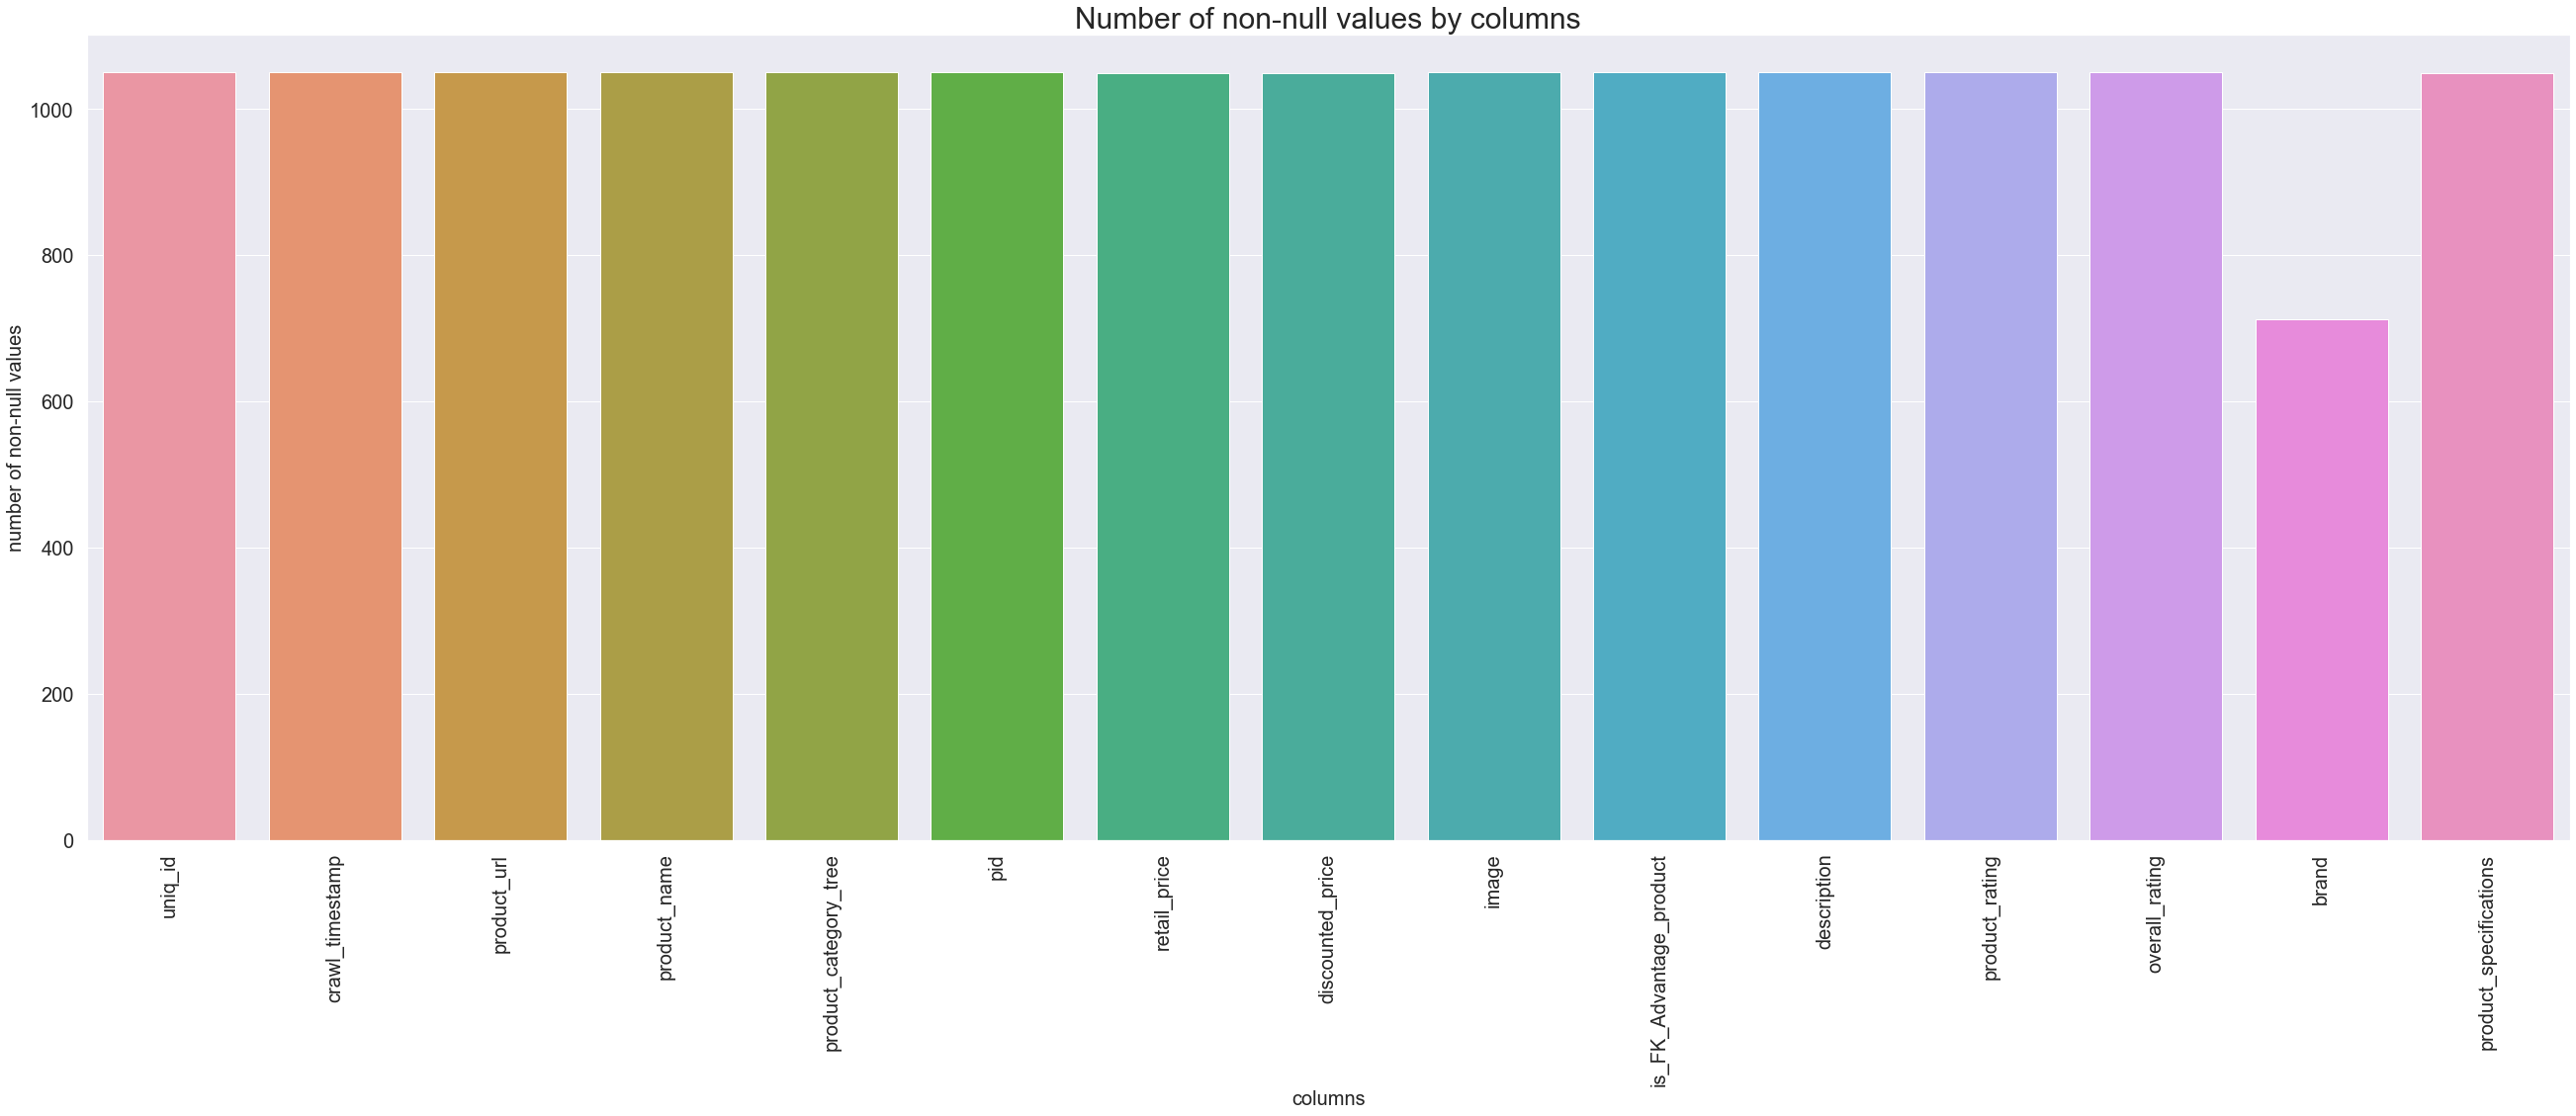

In [10]:
DataSetsExplo(df)

In [11]:
df = df[['product_category_tree', 'description', 'image']]

For the rest, we will keep only 3 columns :
- 'product_category_tree' to get the name of the categories
- 'description' to get the description of a product
- 'image' to get the product image

# 4. Text Data<a class="anchor" id="chapter4"></a>

## 4.1. product_category_tree<a class="anchor" id="section_4_1"></a>

In [12]:
def get_cat(nb):
    cat = []
    for i in range(len(df['product_category_tree'])):
        cat.append(df['product_category_tree'][i].strip('["').strip('"]').split(' >> ')[nb])
    return cat

In [13]:
cat_1 = get_cat(0)
cat_2 = get_cat(1)

In [14]:
df = df.assign(cat_1=cat_1)
df = df.assign(cat_2=cat_2)

Text(0, 0.5, 'Count')

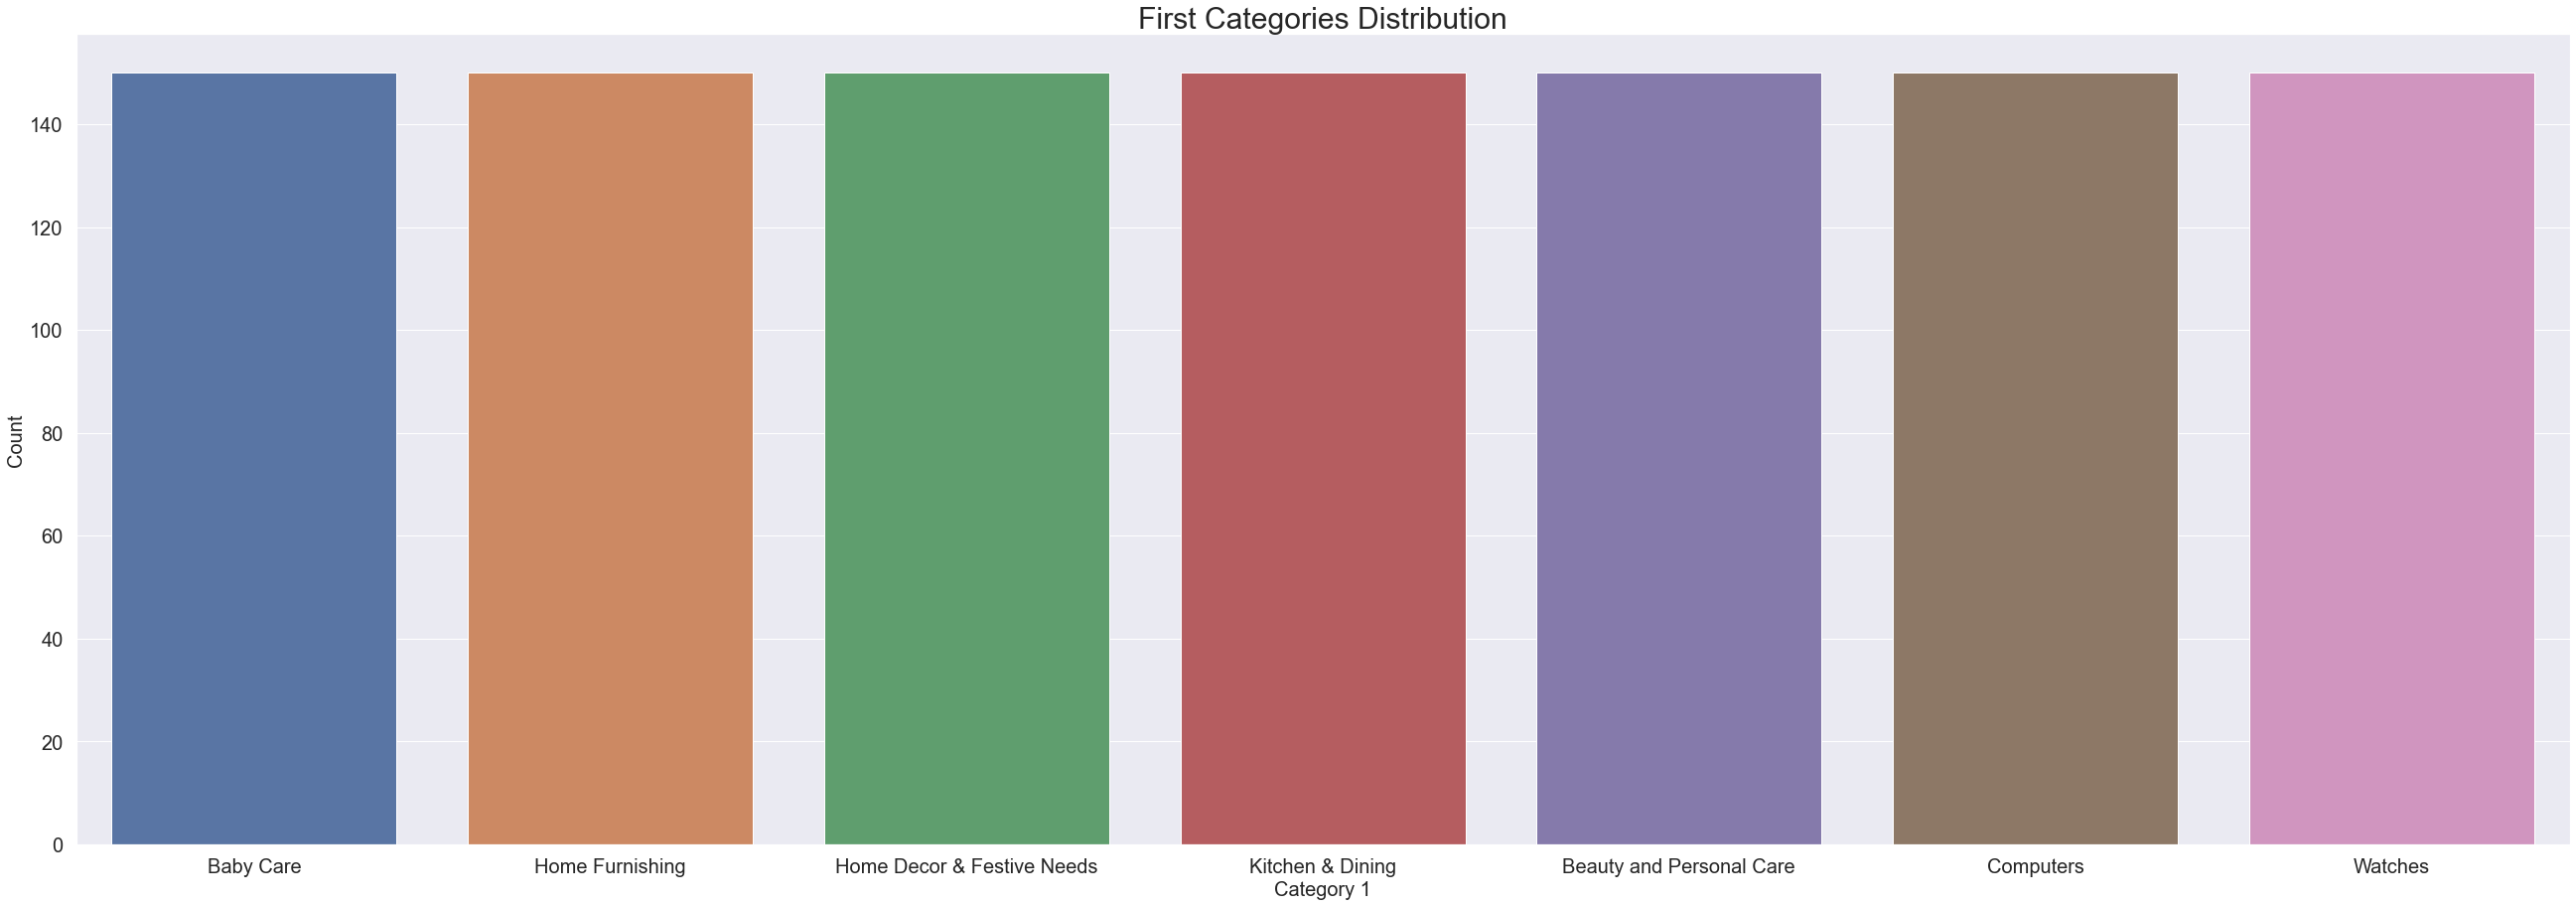

In [15]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.barplot(x=df['cat_1'].value_counts().index,
            y=df['cat_1'].value_counts())
plt.title('First Categories Distribution', fontsize=30)
plt.xlabel('Category 1', size=20)
plt.ylabel('Count', size=20)

Text(0, 0.5, 'Count')

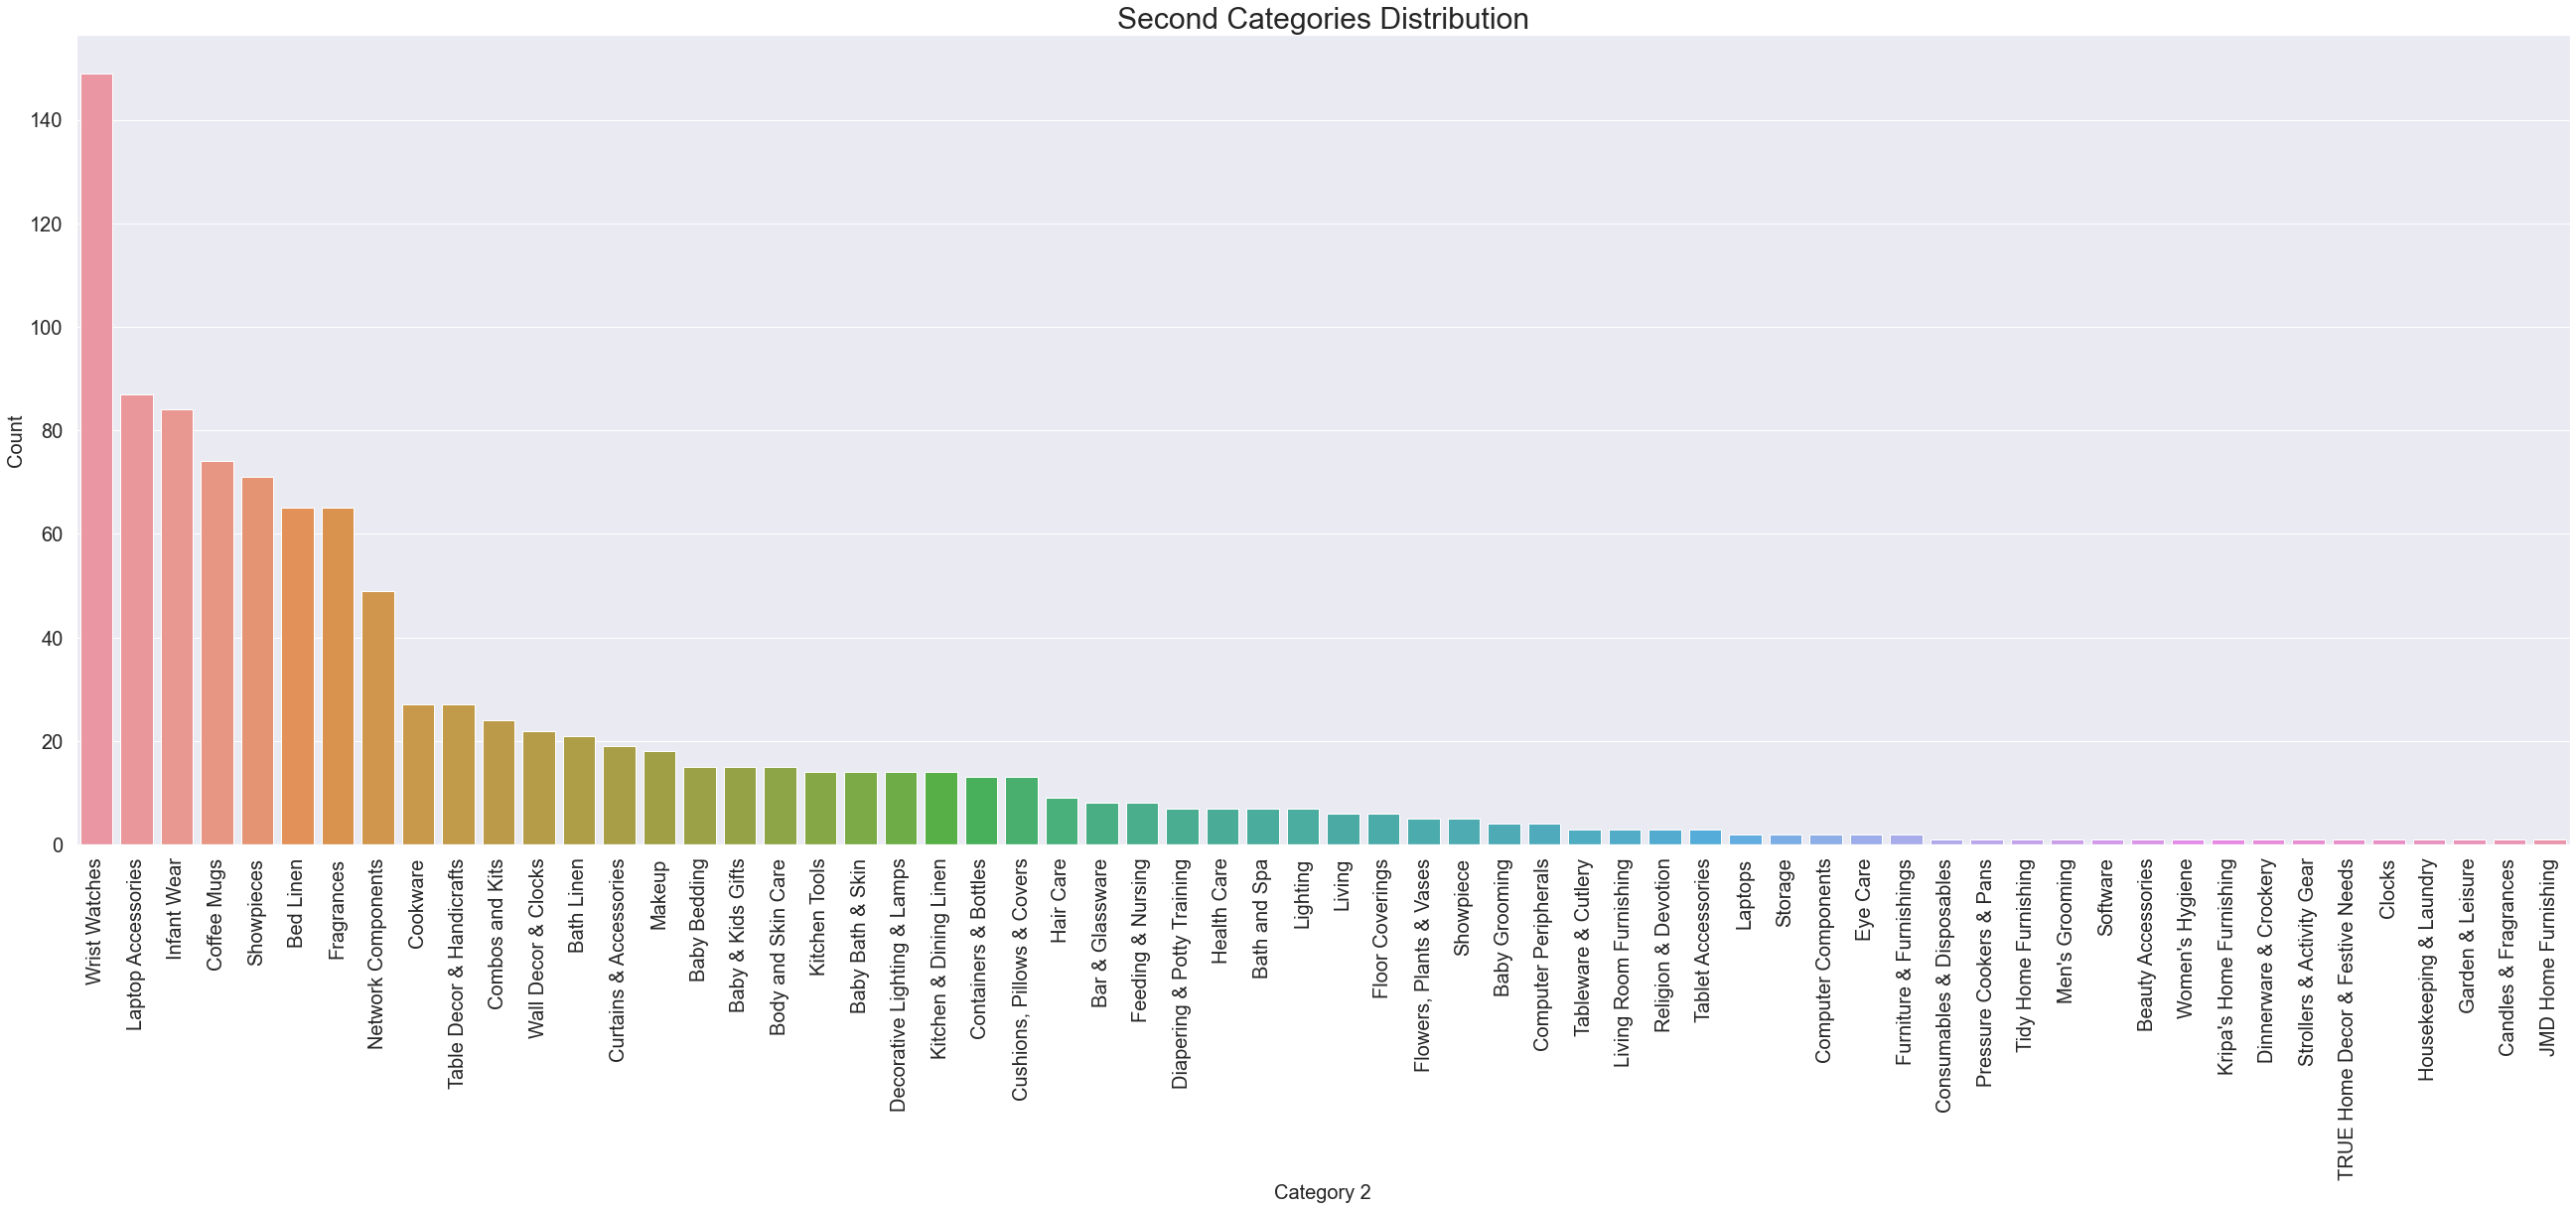

In [16]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df['cat_2'].value_counts().index,
            y=df['cat_2'].value_counts())
plt.title('Second Categories Distribution', fontsize=30)
plt.xlabel('Category 2', size=20)
plt.ylabel('Count', size=20)

In [17]:
df.drop(columns=['product_category_tree', 'cat_2'], inplace=True)

- cat_1 contains 7 categories, equally distributed which is not the case for cat_2.
- So we will only keep cat_1.

## 4.2. description<a class="anchor" id="section_4_2"></a>

- In this part, we will transform the 'description' column.
- For that, we will put the descriptions in lowercase, tokenize them, stemmize them and remove the stopwords.

#### Lower

In [18]:
df['description'] = df['description'].str.lower()

#### Tokenization

In [19]:
def description_tokens(df):
    column = df['description']
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(column)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [20]:
df['description_clean'] = df.apply(description_tokens, axis=1)

#### Stats and Exploratory

In [21]:
def freq_stats(df, column, lookup_table=[]):
    corp = dict()
    corp = df[column]
    stats, freq = dict(), dict()

    for k, v in corp.iteritems():
        freq[k] = fq = nltk.FreqDist(v)
        stats[k] = {'total': len(v), 'unique': len(fq.keys())}
    return (freq, stats, corp)

In [22]:
freq, stats, corp = freq_stats(df, 'description_clean')
df_des_freq = pd.DataFrame.from_dict(stats, orient='index')

In [23]:
df_freq = pd.concat([df, df_des_freq], axis=1)

<AxesSubplot:title={'center':'Number of words by product description before deleting stopwords and stemming'}>

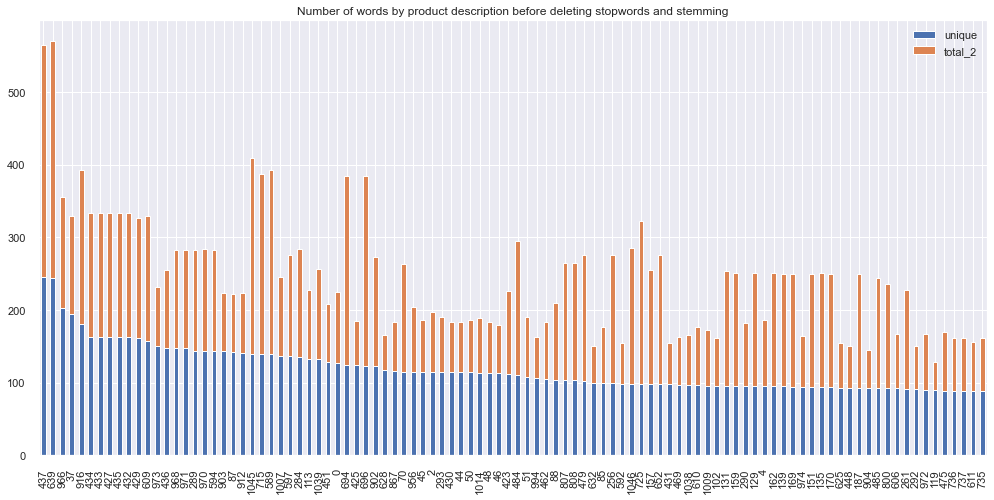

In [24]:
df_freq['total_2'] = df_freq['total'] - df_freq['unique']

df_freq_f = df_freq[['unique', 'total_2']]
df_freq_f = df_freq_f.sort_values('unique', ascending=False)[:100]

df_freq_f.plot(kind='bar',
               stacked=True,
               title='Number of words by product description before deleting stopwords and stemming',
               rot=90,
               figsize=(17, 8))

<AxesSubplot:title={'center':'Histogram of number of word in product description before deleting stopwords and stemming'}, xlabel='Product', ylabel='Count'>

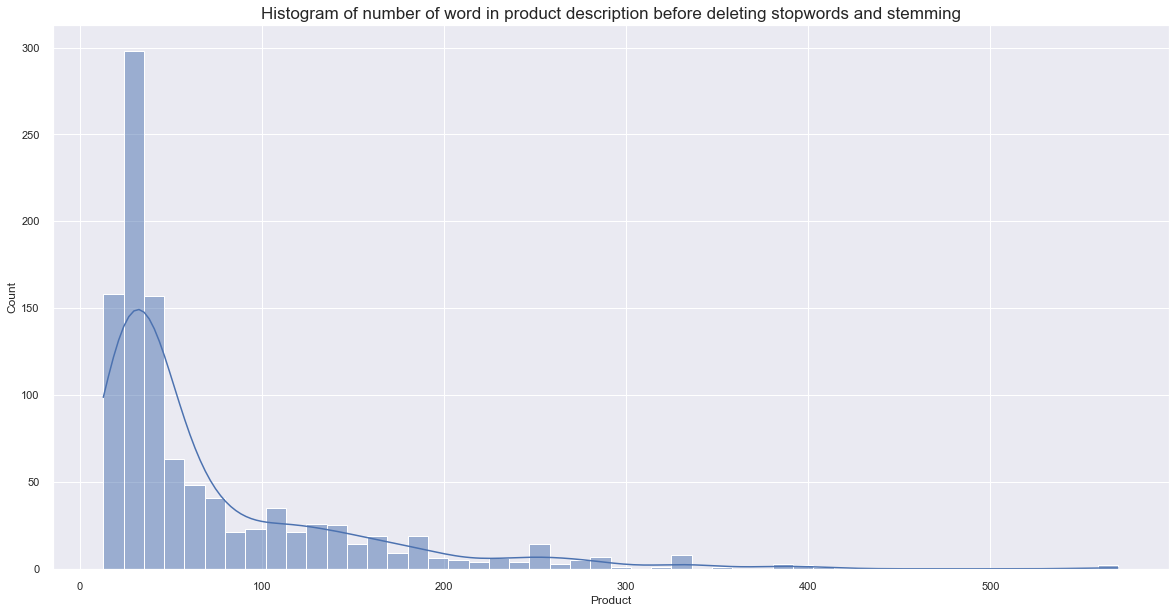

In [25]:
plt.figure(figsize=(20, 10))
plt.title('Histogram of number of word in product description before deleting stopwords and stemming', size=17)
plt.xlabel('Product', size=12)
sns.histplot(df_freq['total'], bins=50, kde=True)

<AxesSubplot:title={'center':'Histogram of number of unique word in product description before deleting stopwords and stemming'}, xlabel='Product', ylabel='Count'>

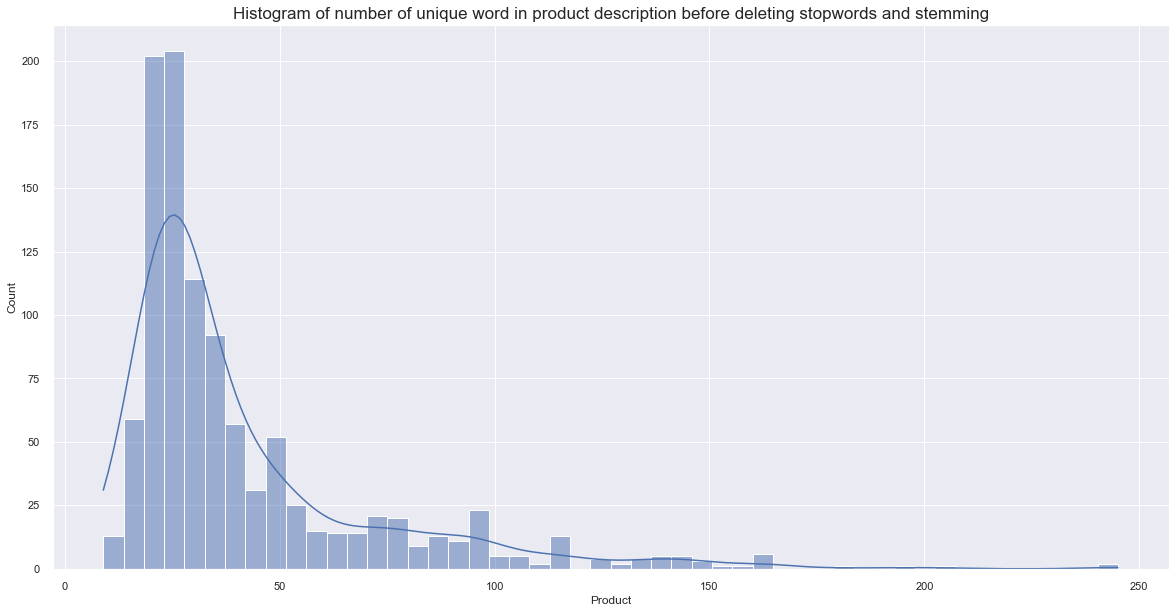

In [26]:
plt.figure(figsize=(20, 10))
plt.title('Histogram of number of unique word in product description before deleting stopwords and stemming', size=17)
plt.xlabel('Product', size=12)
sns.histplot(df_freq['unique'], bins=50, kde=True)

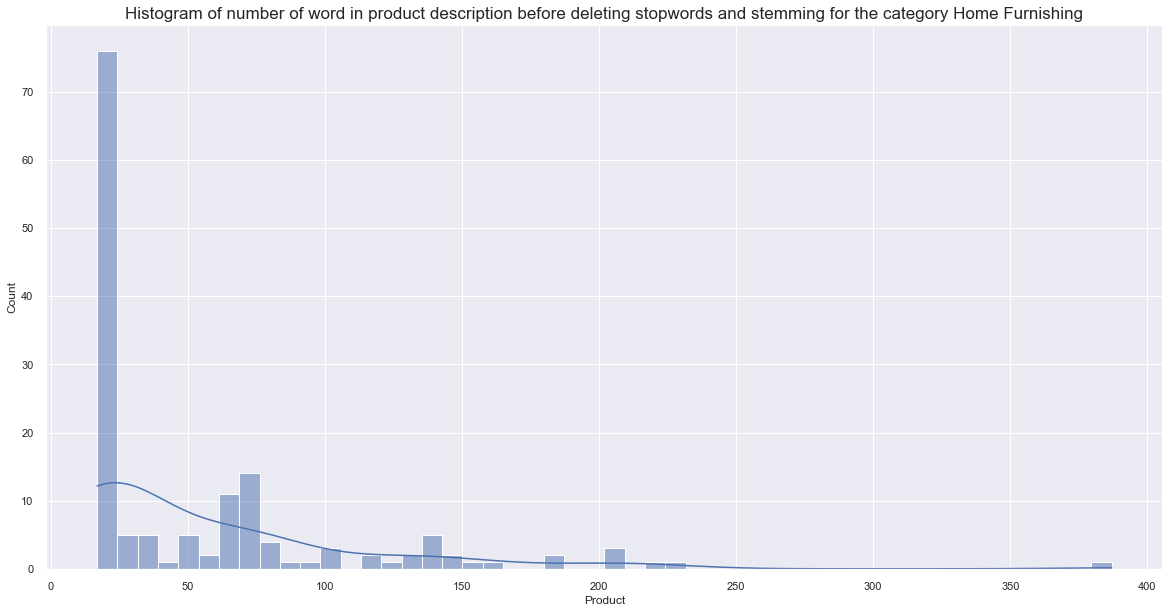

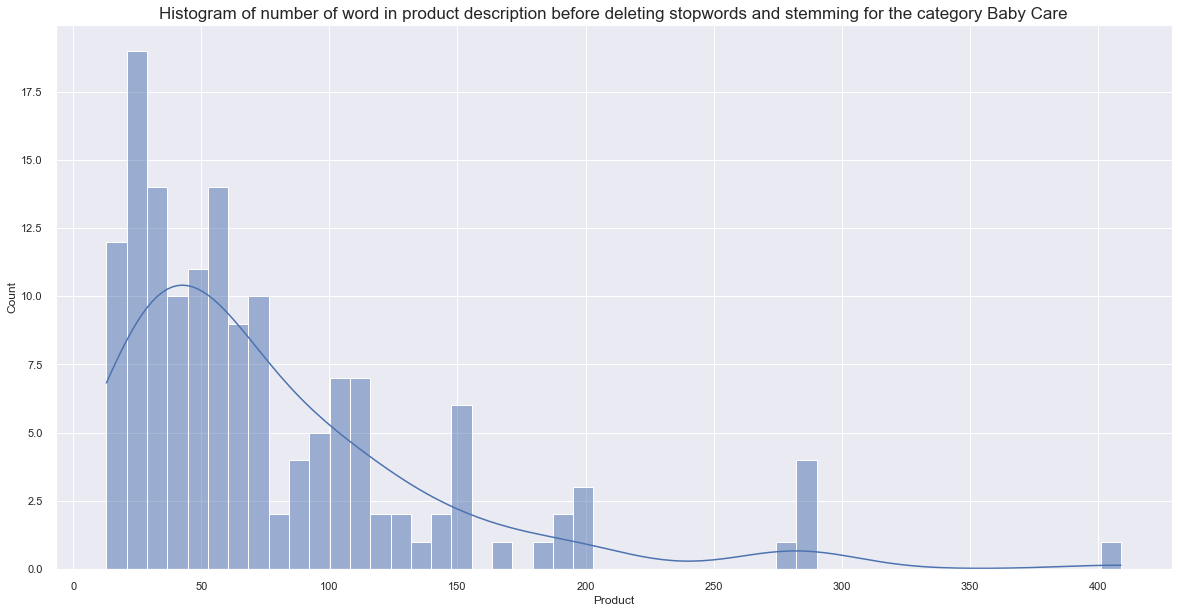

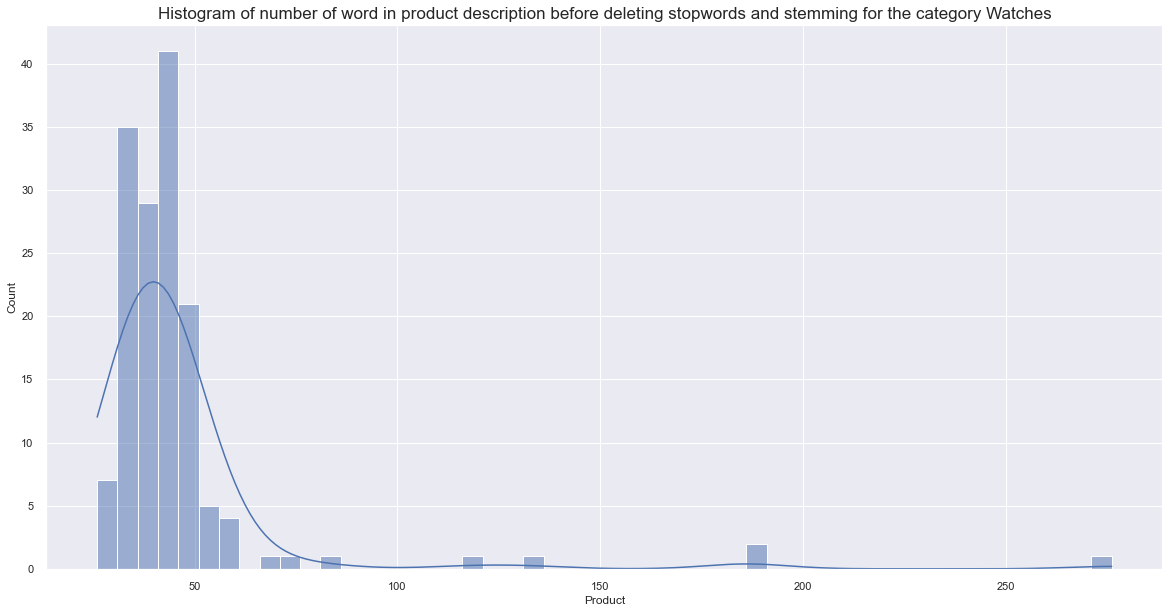

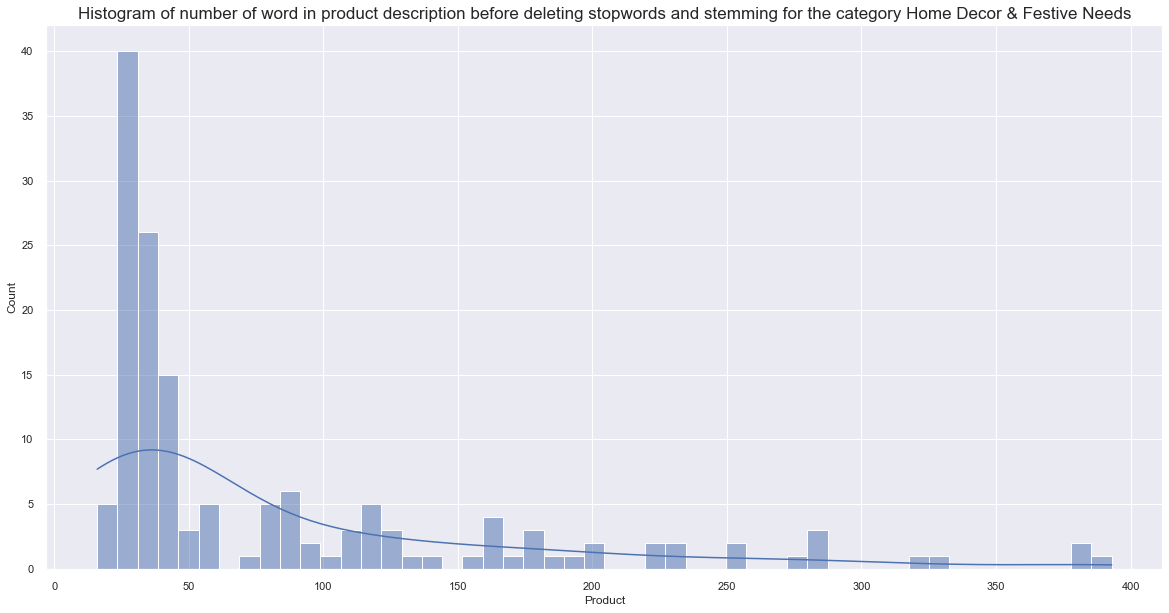

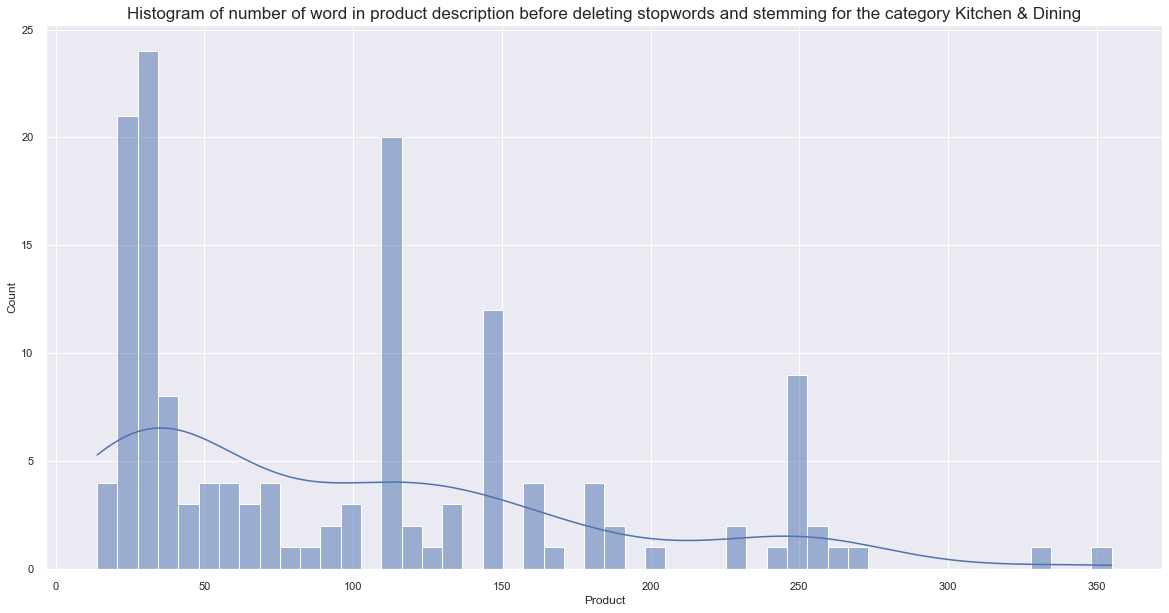

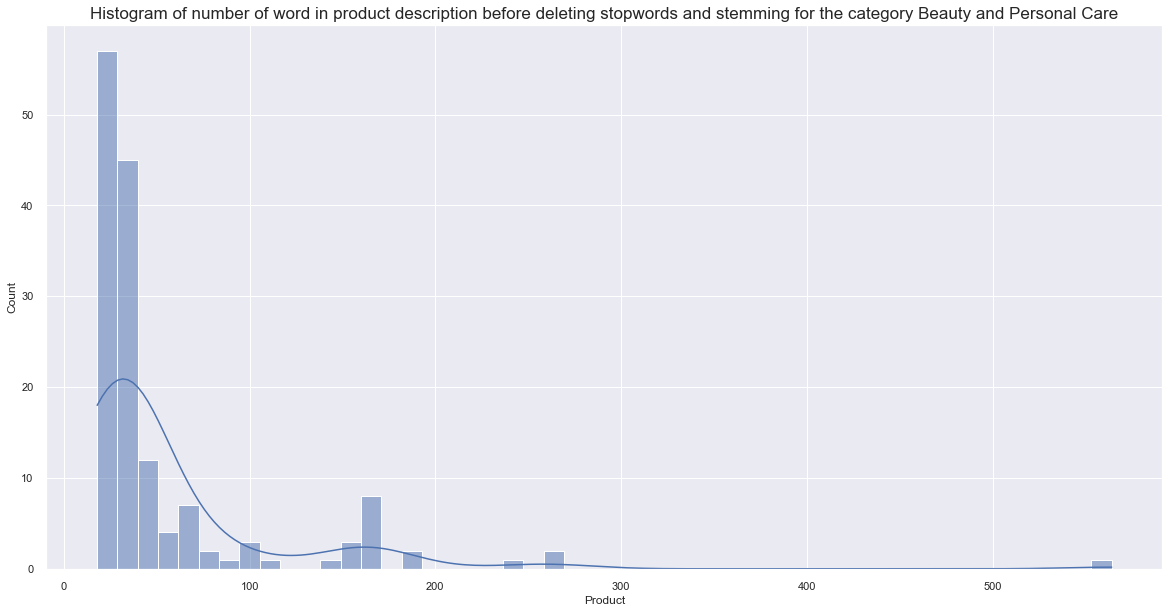

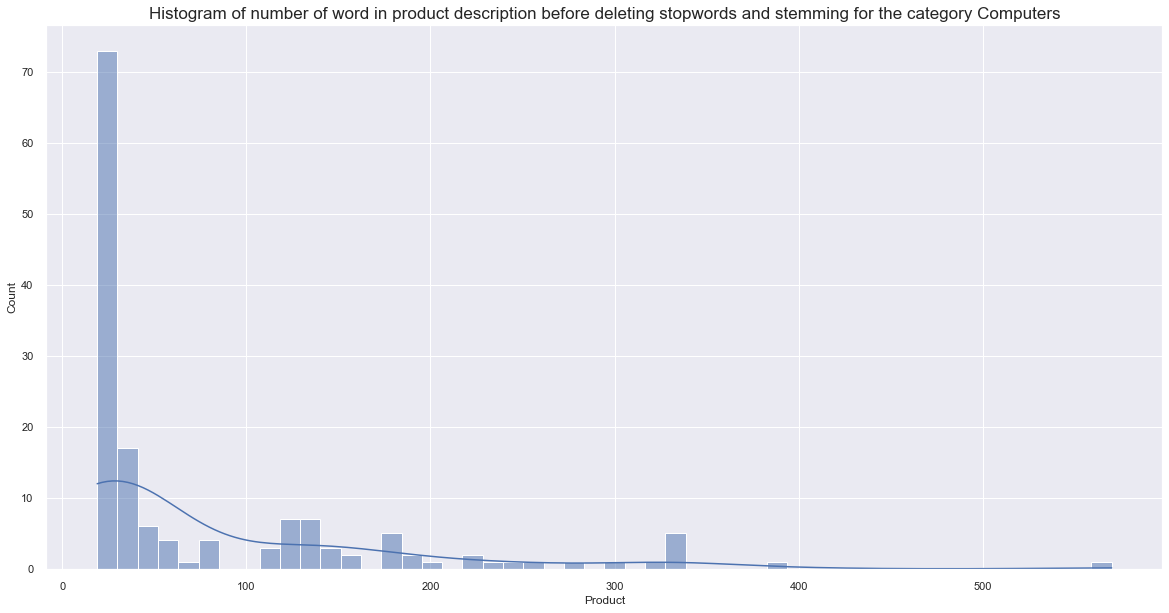

In [27]:
for i in df_freq['cat_1'].unique().tolist():
    plt.figure(figsize=(20, 10))
    plt.title('Histogram of number of word in product description before deleting stopwords and stemming for the category ' + i, size=17)
    plt.xlabel('Product', size=12)
    sns.histplot(df_freq[df_freq['cat_1'] == i]['total'], bins=50, kde=True)

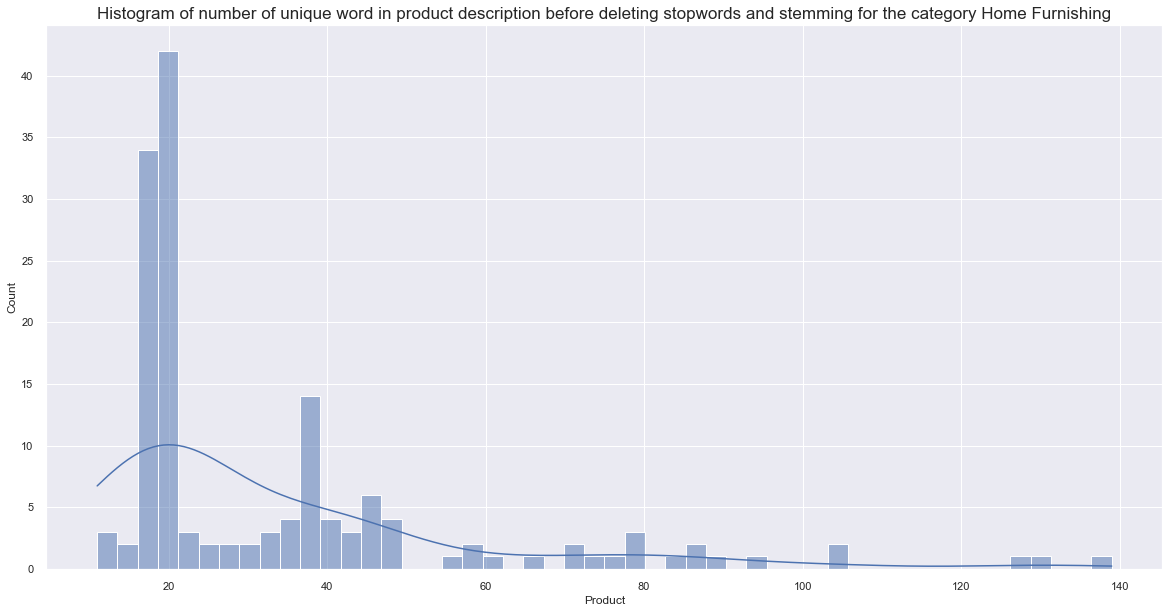

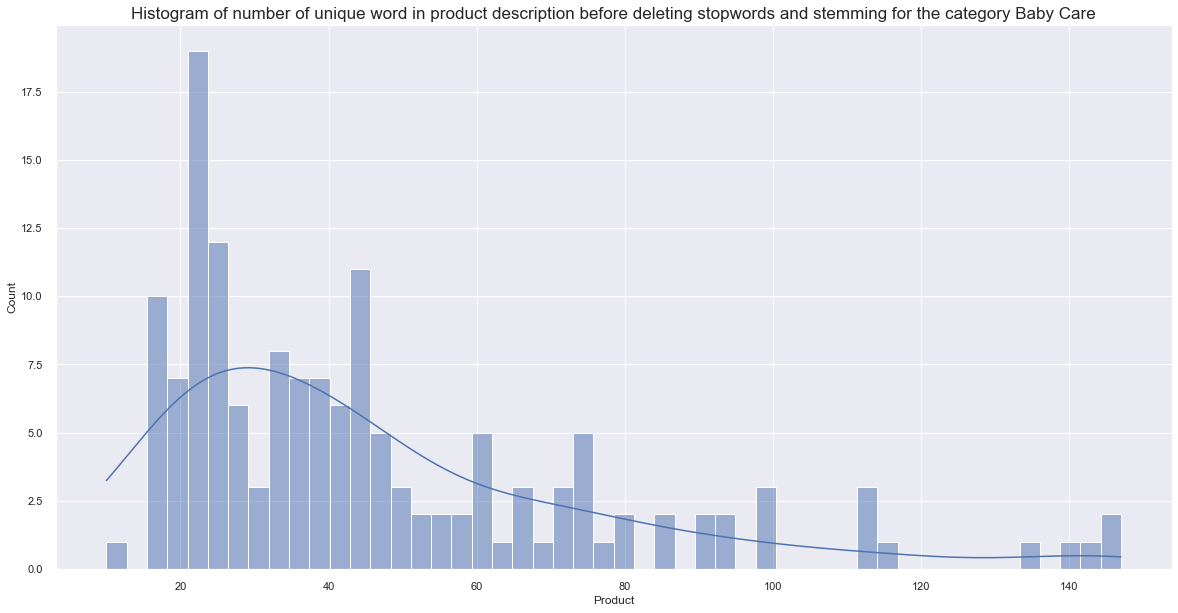

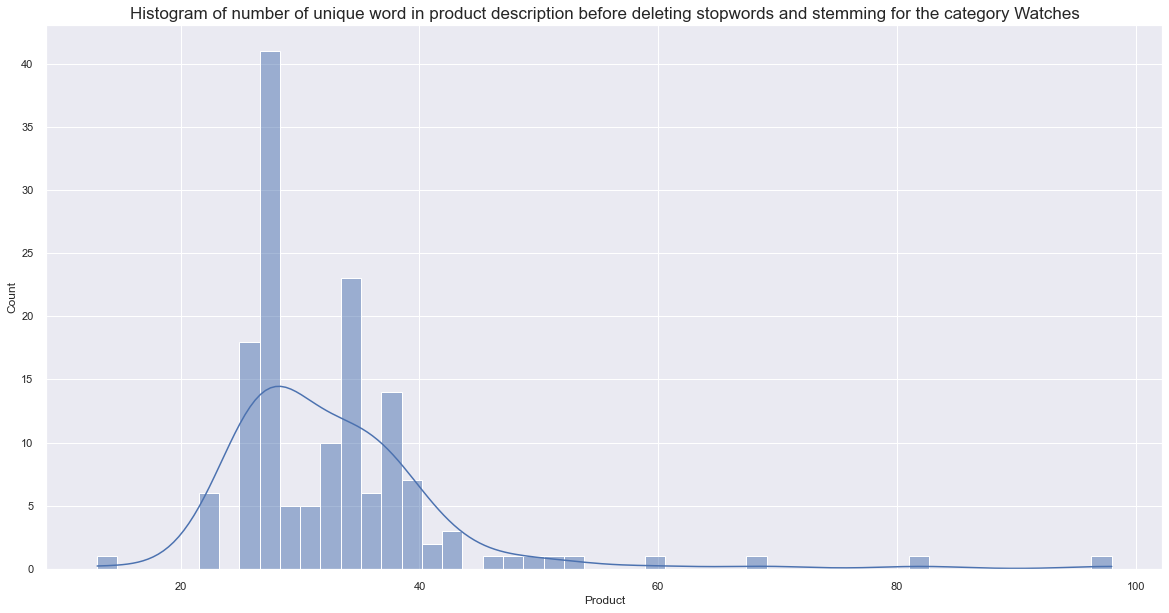

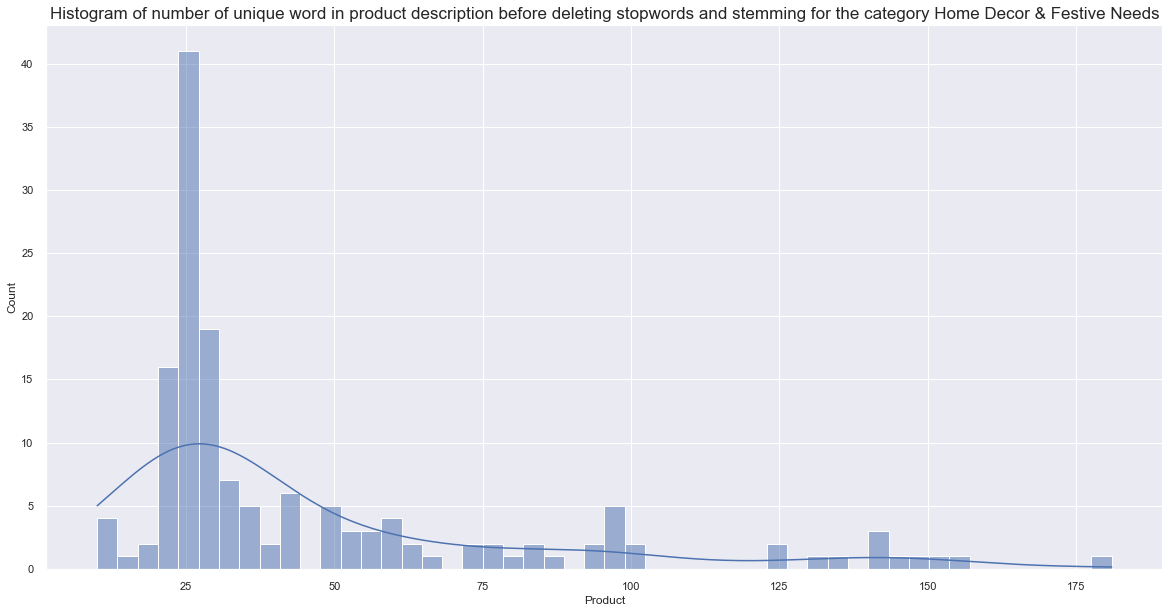

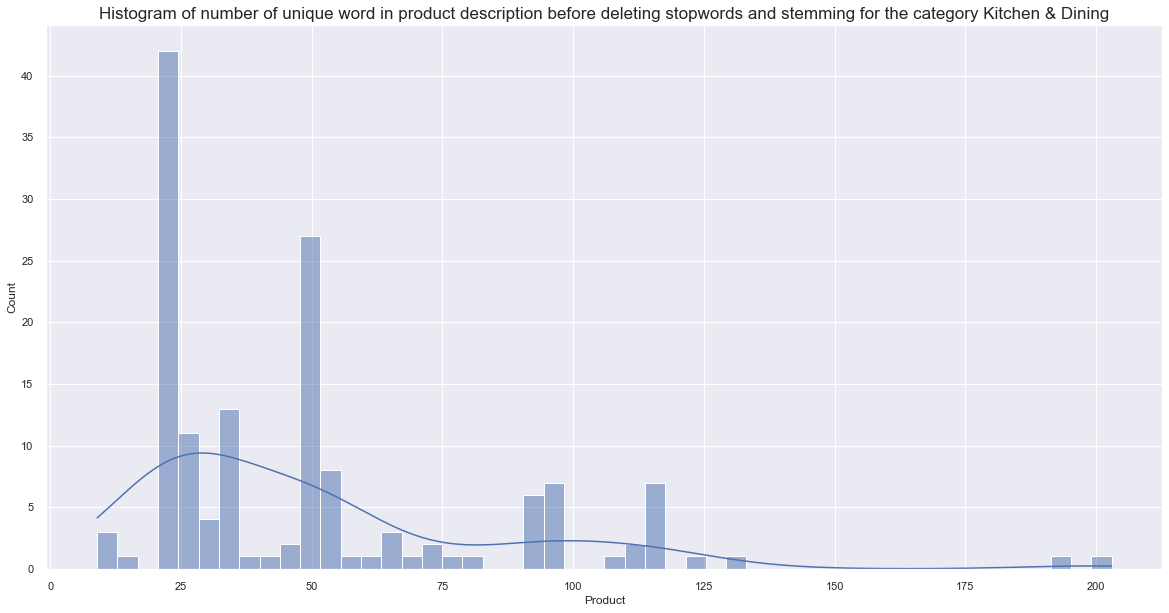

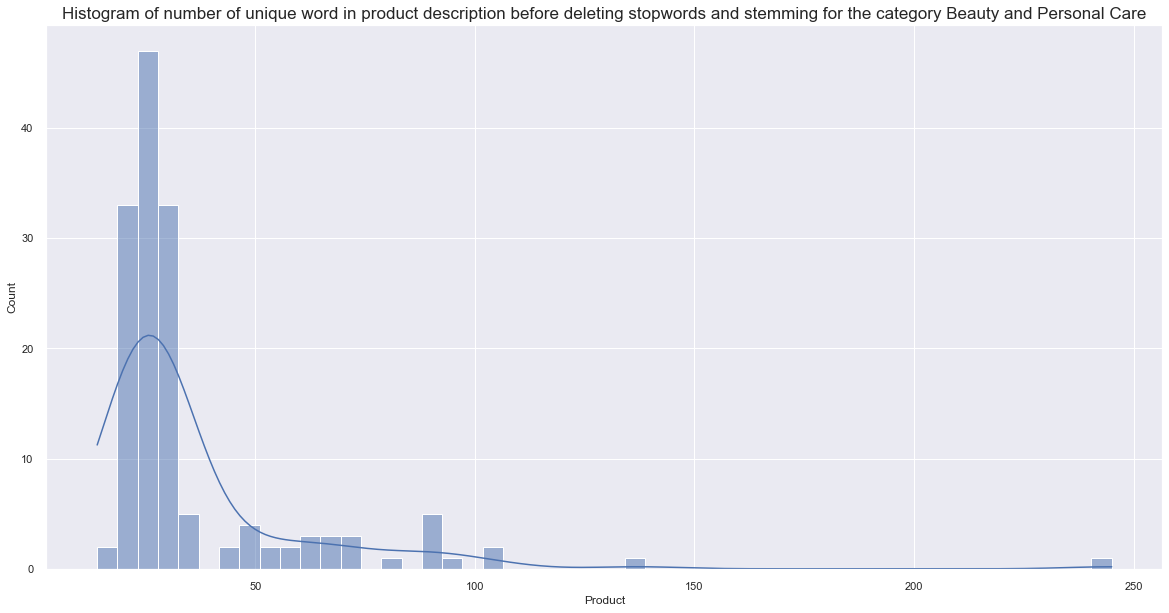

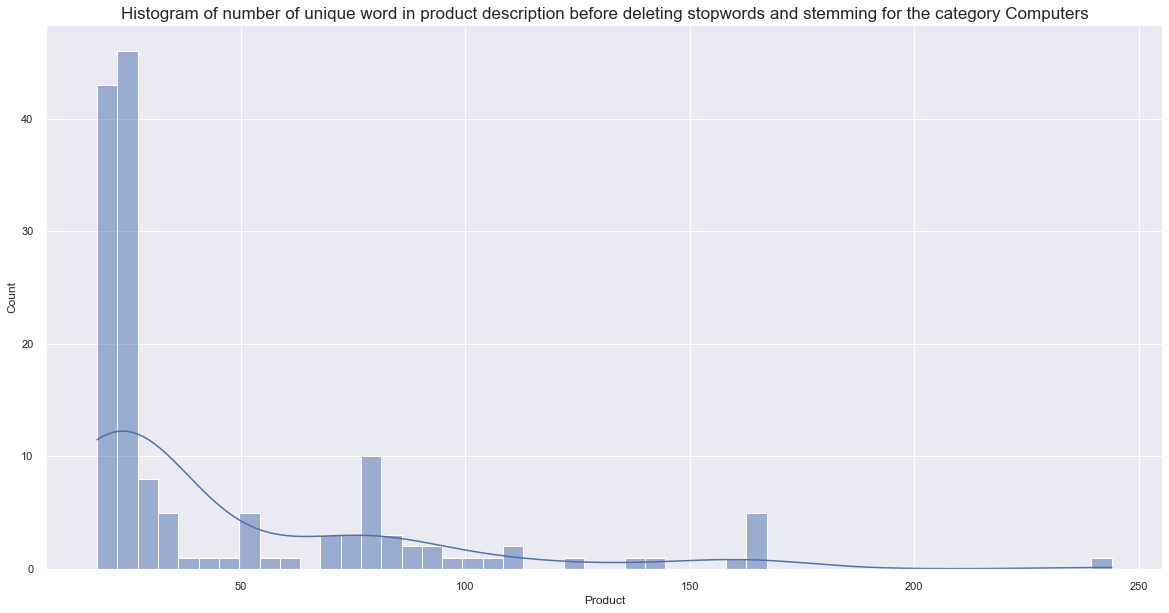

In [28]:
for i in df_freq['cat_1'].unique().tolist():
    plt.figure(figsize=(20, 10))
    plt.title('Histogram of number of unique word in product description before deleting stopwords and stemming for the category ' + i, size=17)
    plt.xlabel('Product', size=12)
    sns.histplot(df_freq[df_freq['cat_1'] == i]['unique'], bins=50, kde=True)

In [29]:
freq_totale = nltk.Counter()
for k, v in corp.iteritems():
    freq_totale += freq[k]

In [30]:
df_word_freq = pd.DataFrame(list(freq_totale.items()), columns=['word', 'freq'])
df_word_freq.head()

word  freq
0        key   215
1   features   395
2         of  1751
3   elegance    11
4  polyester    69

In [31]:
df_word_freq.shape

(5016, 2)

- There are 5016 unique words in the 'description' column.

#### Stopwords

In [32]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
df['description_clean'] = df['description_clean'].apply(lambda x: [item for item in x if item not in stopword])

#### Stemming

In [35]:
stemmer = EnglishStemmer()

In [36]:
df['description_clean'] = df['description_clean'].apply(lambda x: [stemmer.stem(item) for item in x])

#### Stats and Exploratory

In [37]:
freq, stats, corp = freq_stats(df, 'description_clean')
df_des_freq = pd.DataFrame.from_dict(stats, orient='index')

In [38]:
freq_totale = nltk.Counter()
for k, v in corp.iteritems():
    freq_totale += freq[k]

In [39]:
df_word_freq = pd.DataFrame(list(freq_totale.items()), columns=['word', 'freq'])
df_word_freq.head()

word  freq
0         key   224
1      featur   408
2        eleg    63
3     polyest    69
4  multicolor   160

In [40]:
df_word_freq.shape

(3900, 2)

-  After deleting stopwords and stemming, we have 3900 unique words in the 'description' column.

In [41]:
df_word_freq = df_word_freq.sort_values('freq', ascending=False)

Text(0, 0.5, 'Frequency')

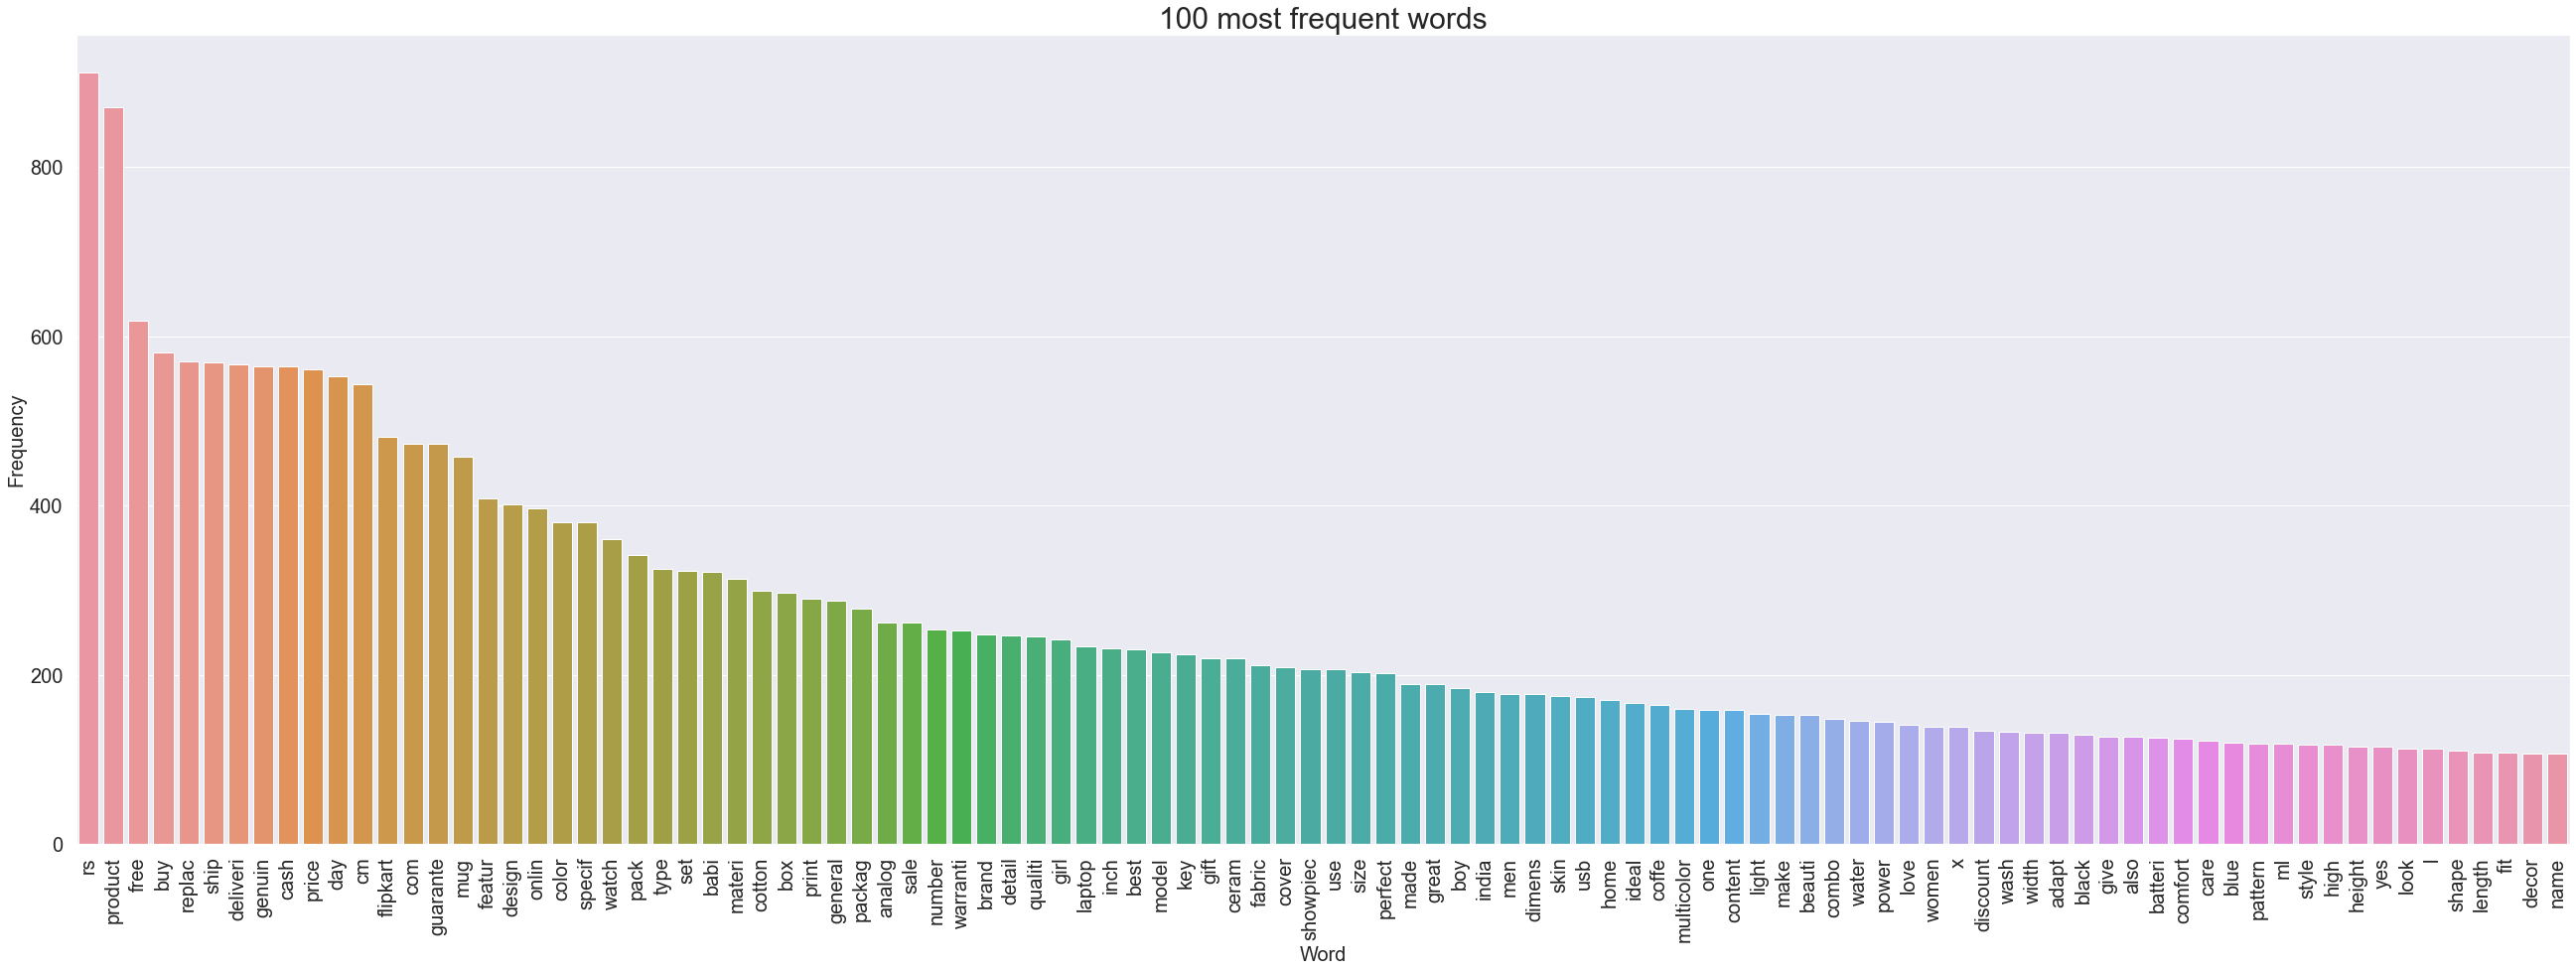

In [42]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df_word_freq['word'][:100],
            y=df_word_freq['freq'][:100])
plt.title('100 most frequent words', fontsize=30)
plt.xlabel('Word', size=20)
plt.ylabel('Frequency', size=20)

In [43]:
df_wc = dict(zip(df_word_freq['word'][:100].tolist(), df_word_freq['freq'][:100].tolist()))

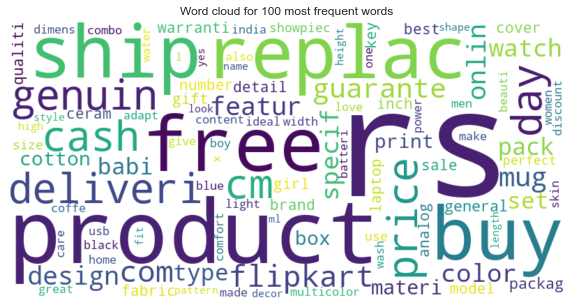

In [44]:
wc = WordCloud(width=800, height=400, max_words=100, background_color="white", random_state=42).generate_from_frequencies(df_wc)

plt.figure(figsize=(10, 10))
plt.title('Word cloud for 100 most frequent words')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0, 0.5, 'Frequency')

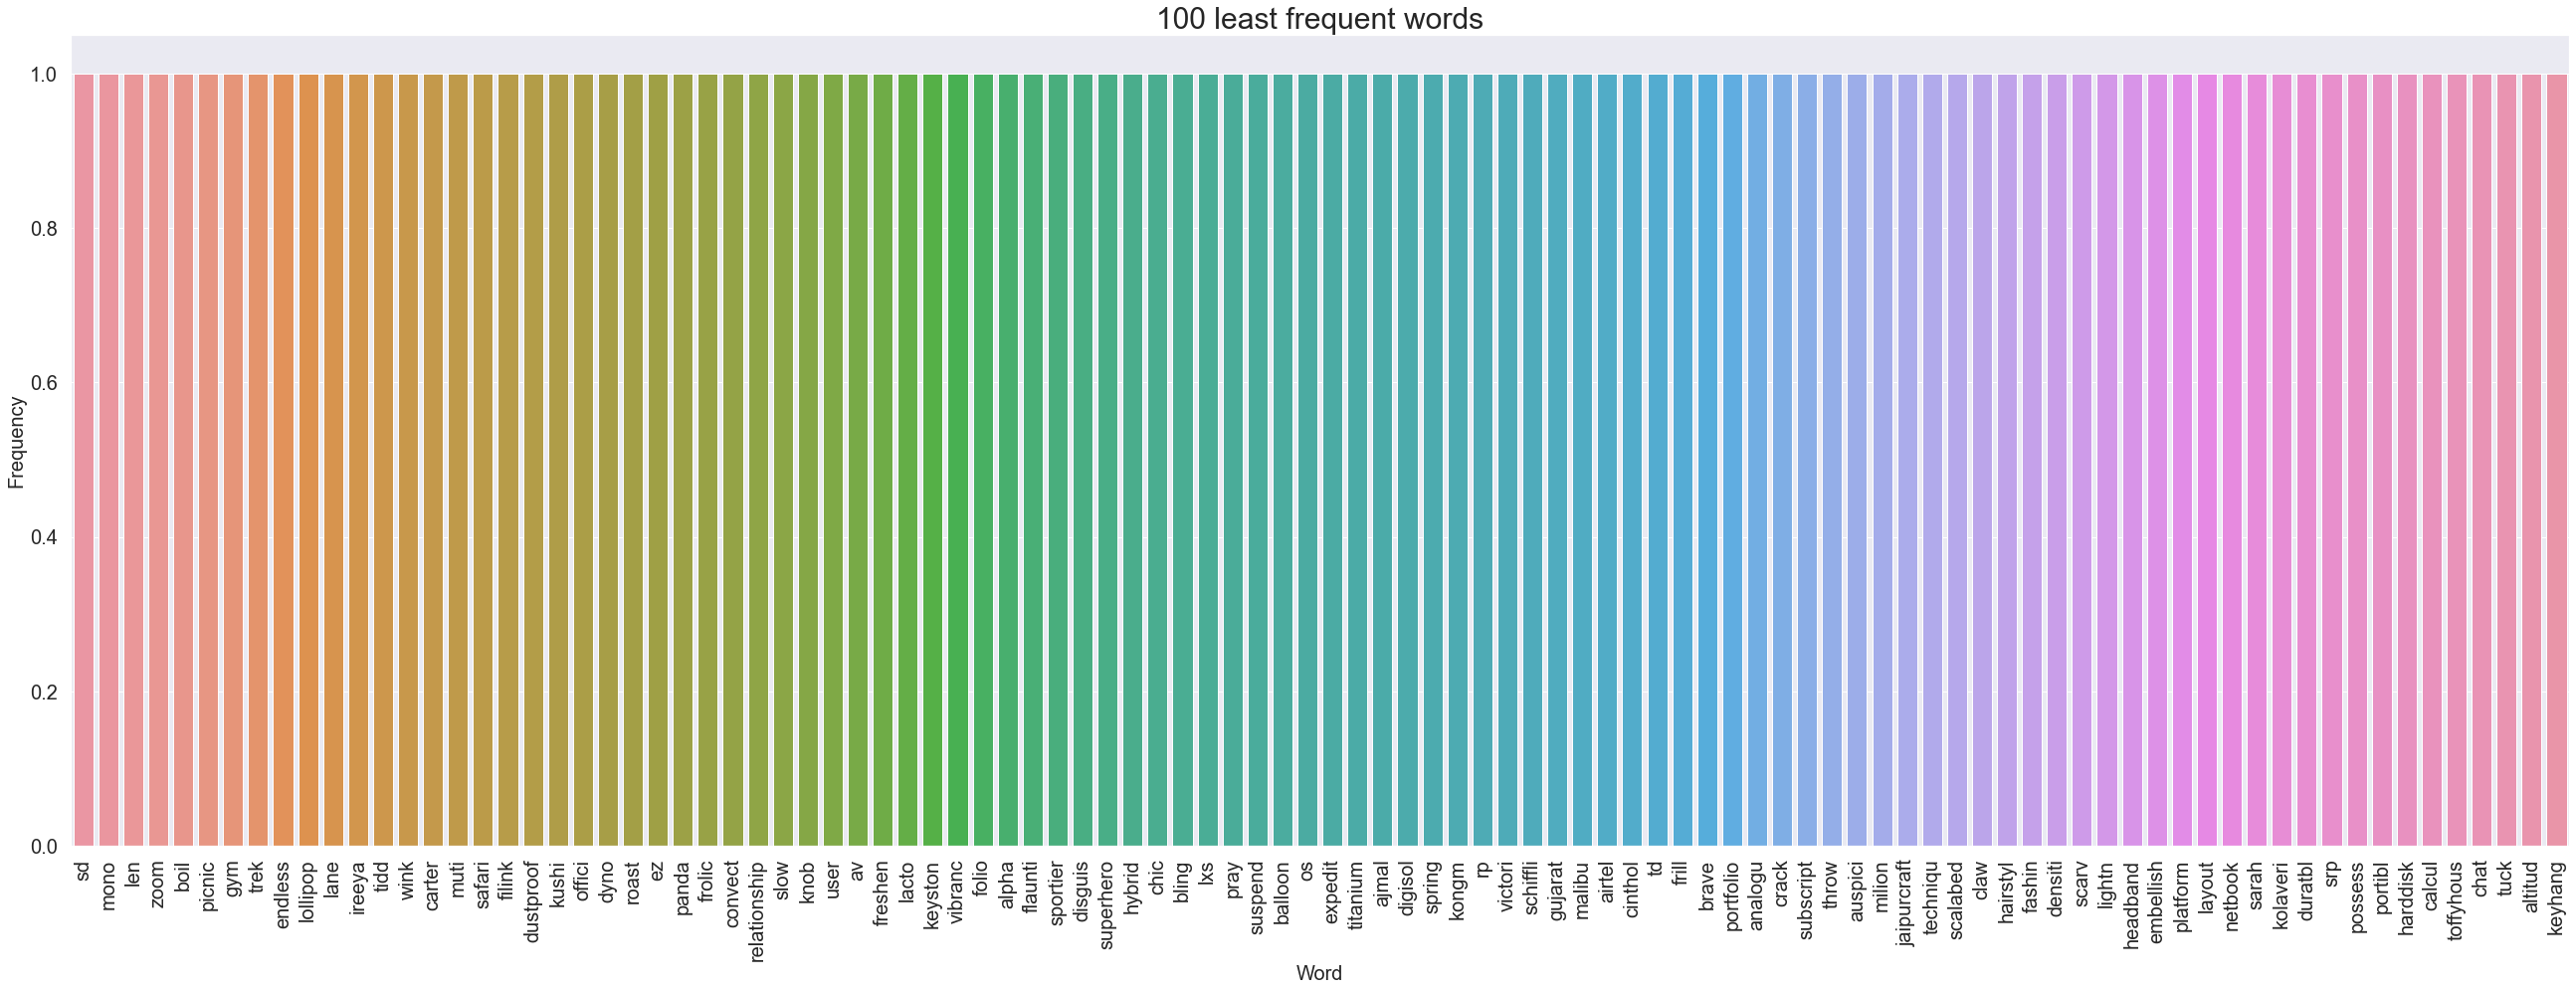

In [45]:
plt.figure(figsize=(45, 15))
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
sns.barplot(x=df_word_freq['word'][-100:],
            y=df_word_freq['freq'][-100:])
plt.title('100 least frequent words', fontsize=30)
plt.xlabel('Word', size=20)
plt.ylabel('Frequency', size=20)

In [46]:
df_wc = dict(zip(df_word_freq['word'][-100:].tolist(), df_word_freq['freq'][-100:].tolist()))

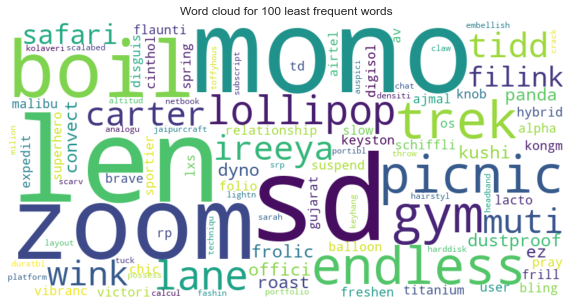

In [47]:
wc = WordCloud(width=800, height=400, max_words=100, background_color="white", random_state=42).generate_from_frequencies(df_wc)

plt.figure(figsize=(10, 10))
plt.title('Word cloud for 100 least frequent words')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Words with a frequency of 1

We will delete words with a frequency equal to 1.

In [48]:
word_freq_1 = df_word_freq[df_word_freq['freq'] == 1]['word'].values.tolist()

In [49]:
len(word_freq_1)

1031

In [50]:
df['description_clean'] = df['description_clean'].apply(lambda x: [item for item in x if item not in word_freq_1])

#### 100 very frequent words

We will remove the words with the highest frequency.

In [51]:
word_freq_2 = df_word_freq['word'][:100].tolist()

In [52]:
word_freq_2

['rs',
 'product',
 'free',
 'buy',
 'replac',
 'ship',
 'deliveri',
 'genuin',
 'cash',
 'price',
 'day',
 'cm',
 'flipkart',
 'com',
 'guarante',
 'mug',
 'featur',
 'design',
 'onlin',
 'color',
 'specif',
 'watch',
 'pack',
 'type',
 'set',
 'babi',
 'materi',
 'cotton',
 'box',
 'print',
 'general',
 'packag',
 'analog',
 'sale',
 'number',
 'warranti',
 'brand',
 'detail',
 'qualiti',
 'girl',
 'laptop',
 'inch',
 'best',
 'model',
 'key',
 'gift',
 'ceram',
 'fabric',
 'cover',
 'showpiec',
 'use',
 'size',
 'perfect',
 'made',
 'great',
 'boy',
 'india',
 'men',
 'dimens',
 'skin',
 'usb',
 'home',
 'ideal',
 'coffe',
 'multicolor',
 'one',
 'content',
 'light',
 'make',
 'beauti',
 'combo',
 'water',
 'power',
 'love',
 'women',
 'x',
 'discount',
 'wash',
 'width',
 'adapt',
 'black',
 'give',
 'also',
 'batteri',
 'comfort',
 'care',
 'blue',
 'pattern',
 'ml',
 'style',
 'high',
 'height',
 'yes',
 'look',
 'l',
 'shape',
 'length',
 'fit',
 'decor',
 'name']

In [53]:
word_freq_drop = ['mug', 'watch', 'cotton', 'laptop', 'skin', 'usb', 'coffe']

In [54]:
word_freq_2 = [e for e in word_freq_2 if e not in word_freq_drop]

In [55]:
df['description_clean'] = df['description_clean'].apply(lambda x: [item for item in x if item not in word_freq_2])

#### Stats and Exploratory

In [56]:
freq, stats, corp = freq_stats(df, 'description_clean')
df_des_freq = pd.DataFrame.from_dict(stats, orient='index')

In [57]:
df_freq = pd.concat([df, df_des_freq], axis=1)

<AxesSubplot:title={'center':'Number of words by product description after deleting stopwords and stemming'}>

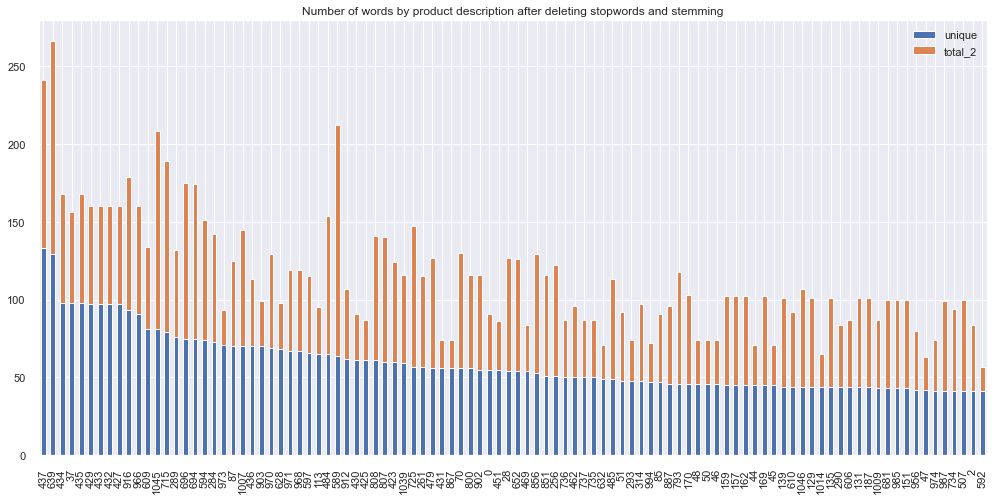

In [58]:
df_freq['total_2'] = df_freq['total'] - df_freq['unique']

df_freq_f = df_freq[['unique', 'total_2']]
df_freq_f = df_freq_f.sort_values('unique', ascending=False)[:100]

df_freq_f.plot(kind='bar',
               stacked=True,
               title='Number of words by product description after deleting stopwords and stemming',
               rot=90,
               figsize=(17, 8))

<AxesSubplot:title={'center':'Histogram of number of word in product description after deleting stopwords and stemming'}, xlabel='Product', ylabel='Count'>

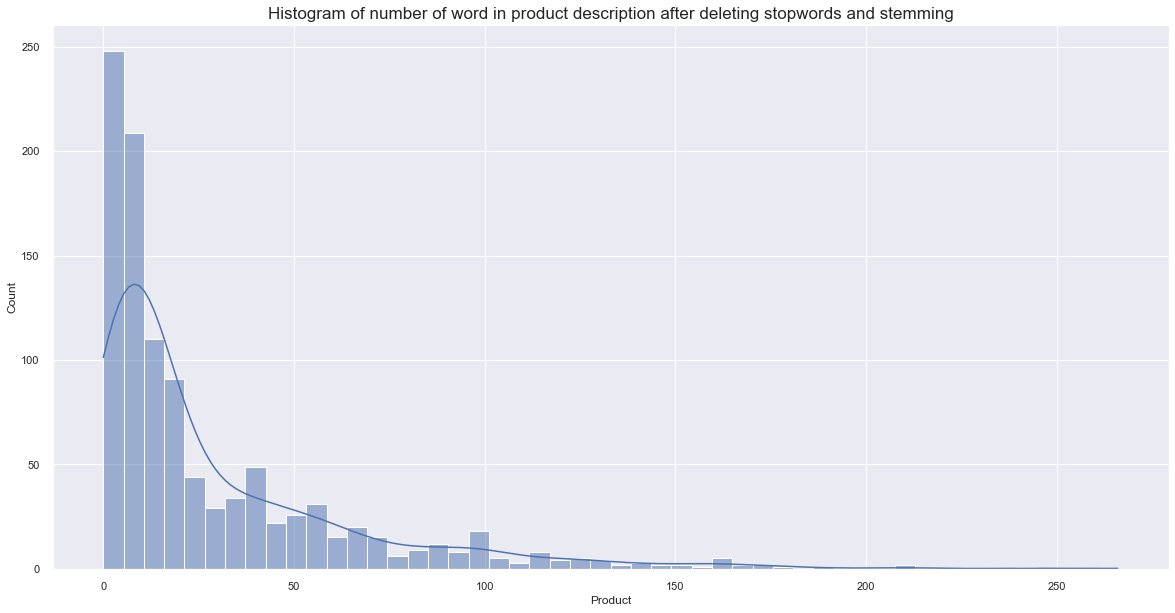

In [59]:
plt.figure(figsize=(20, 10))
plt.title('Histogram of number of word in product description after deleting stopwords and stemming', size=17)
plt.xlabel('Product', size=12)
sns.histplot(df_freq['total'], bins=50, kde=True)

<AxesSubplot:title={'center':'Histogram of number of unique word in product description after deleting stopwords and stemming'}, xlabel='Product', ylabel='Count'>

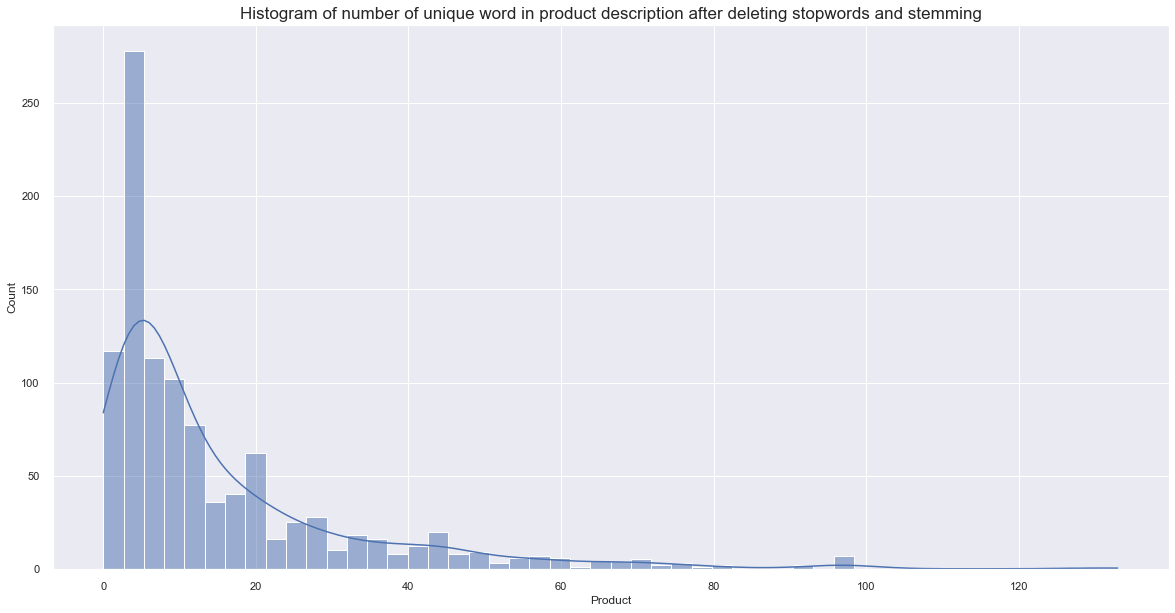

In [60]:
plt.figure(figsize=(20, 10))
plt.title('Histogram of number of unique word in product description after deleting stopwords and stemming', size=17)
plt.xlabel('Product', size=12)
sns.histplot(df_freq['unique'], bins=50, kde=True)

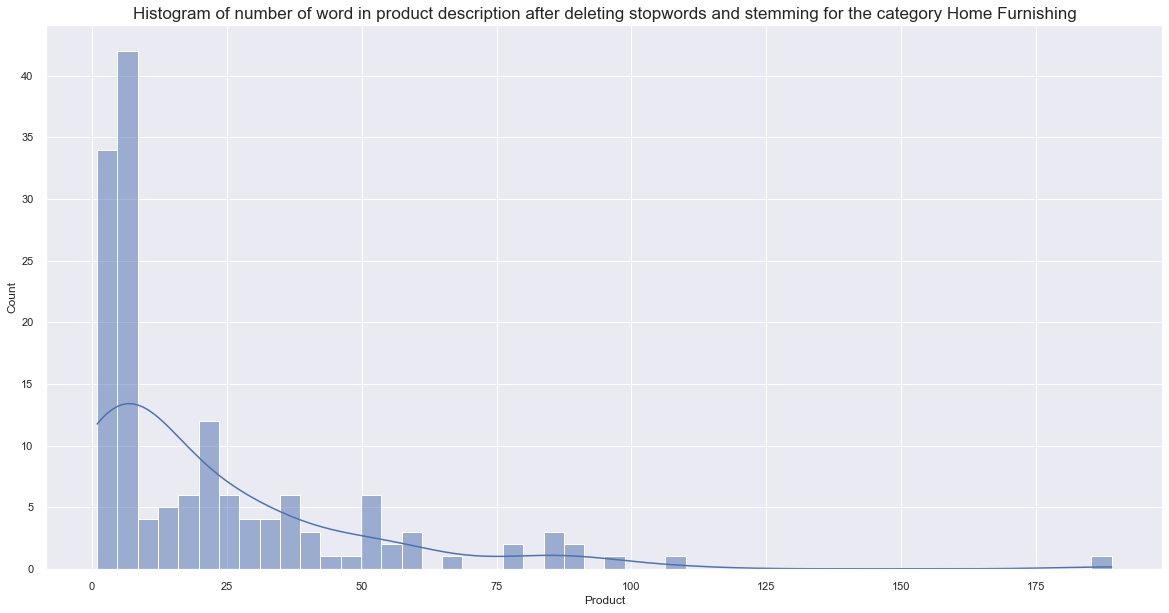

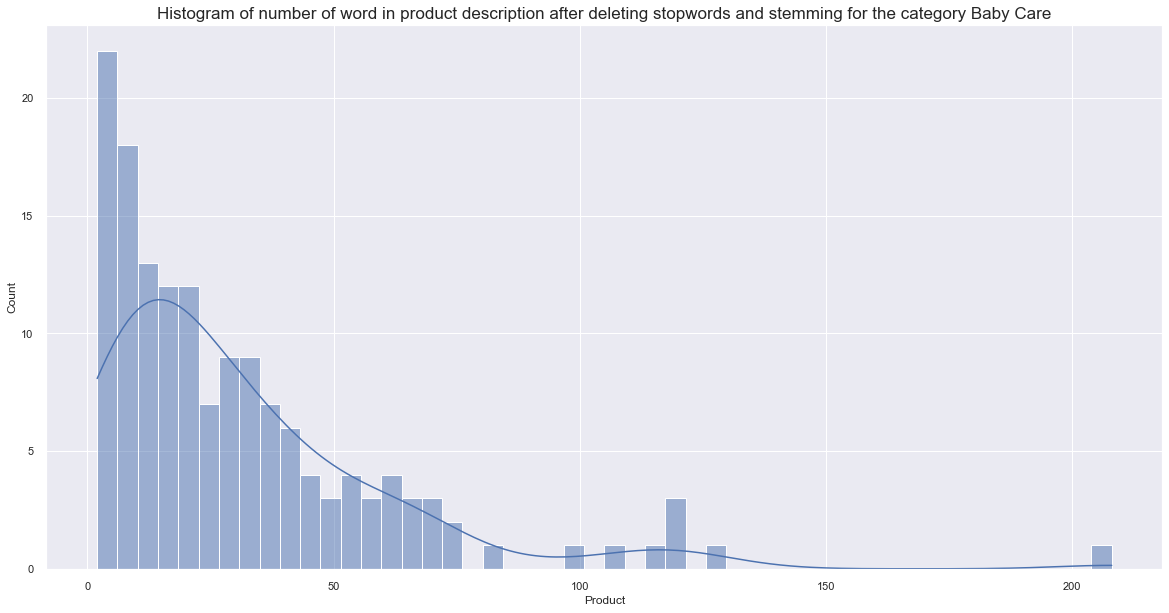

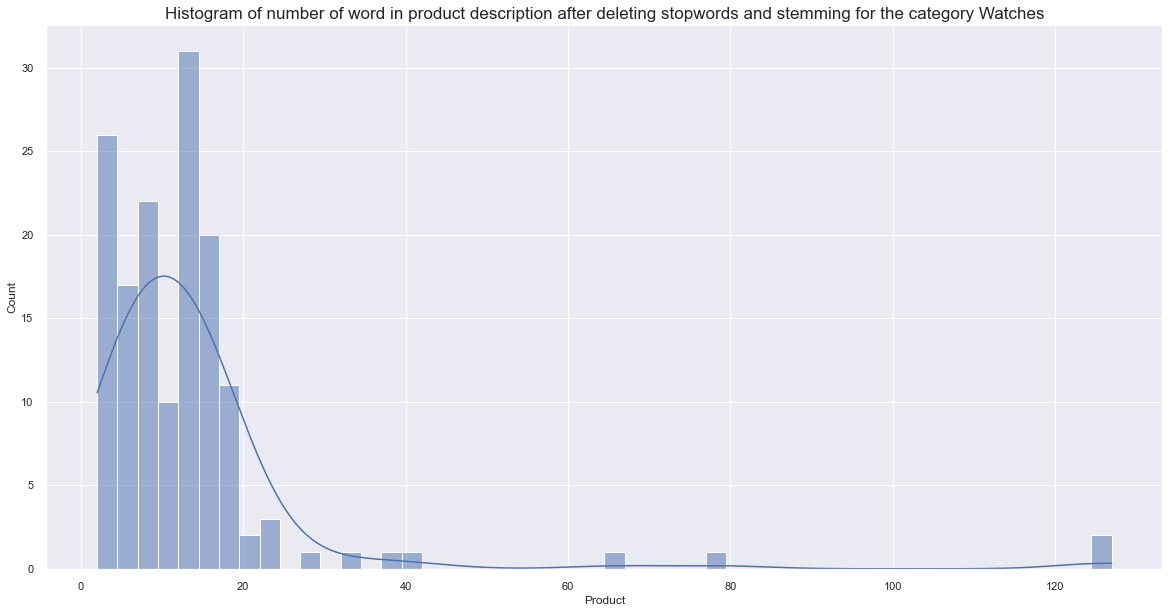

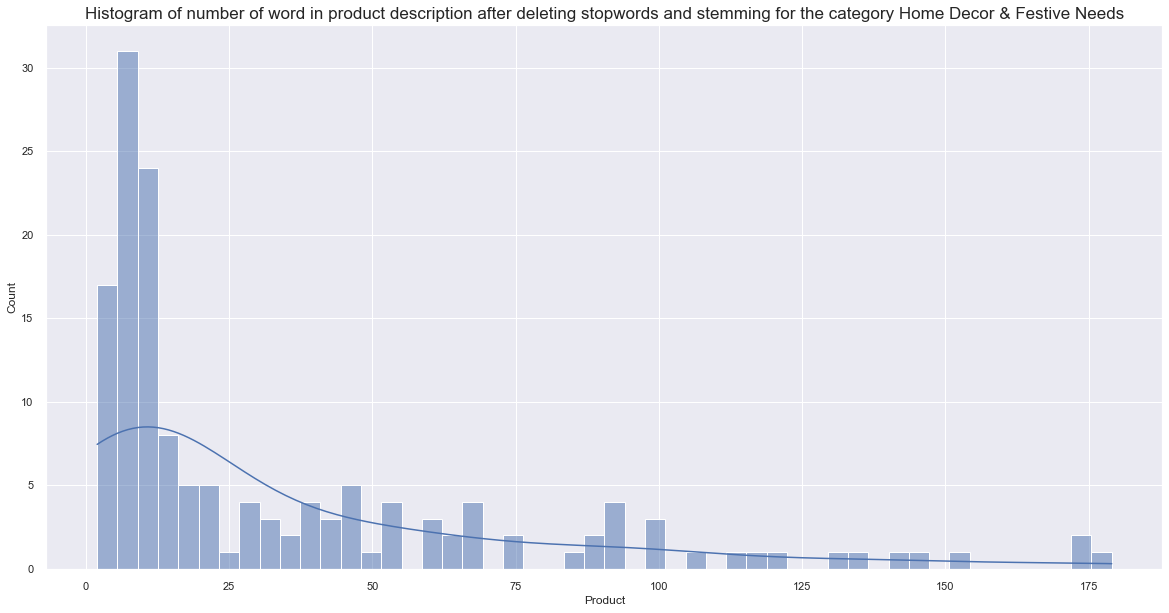

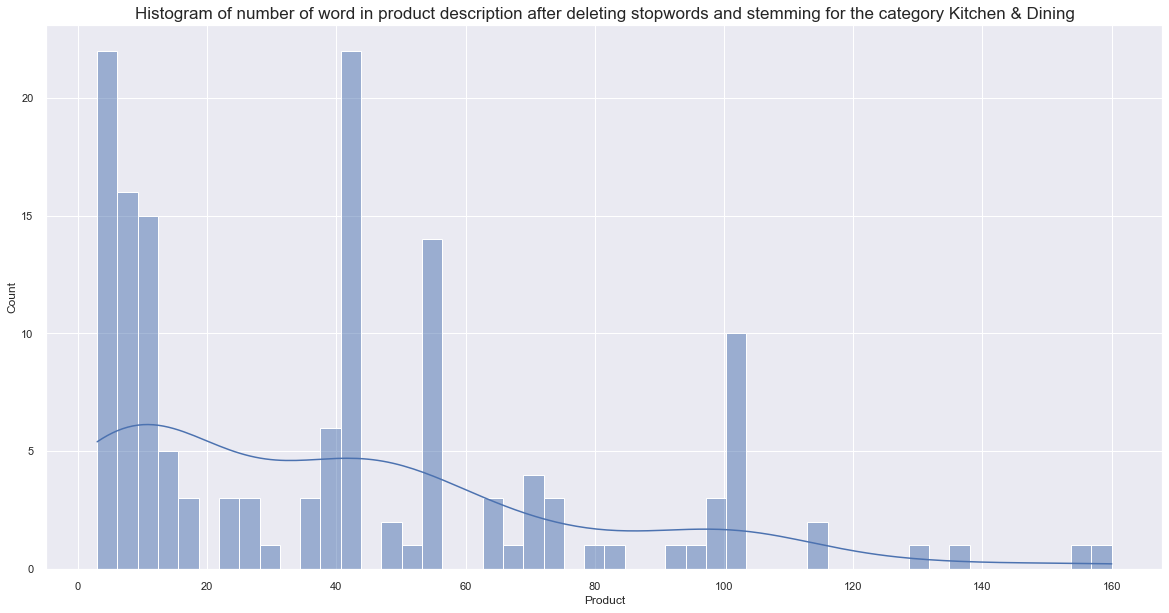

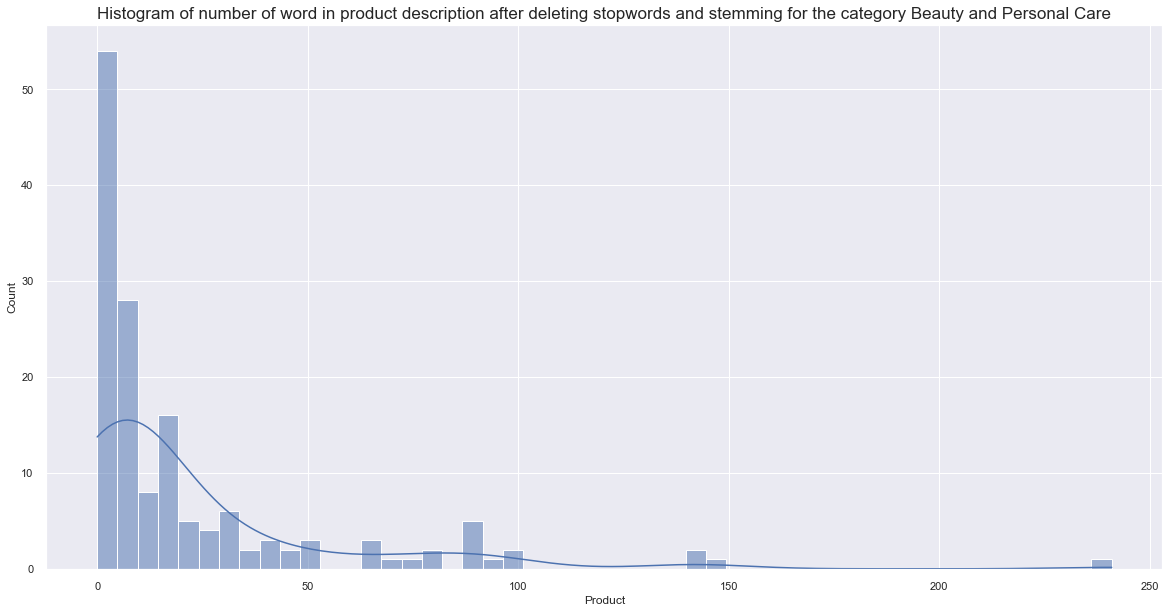

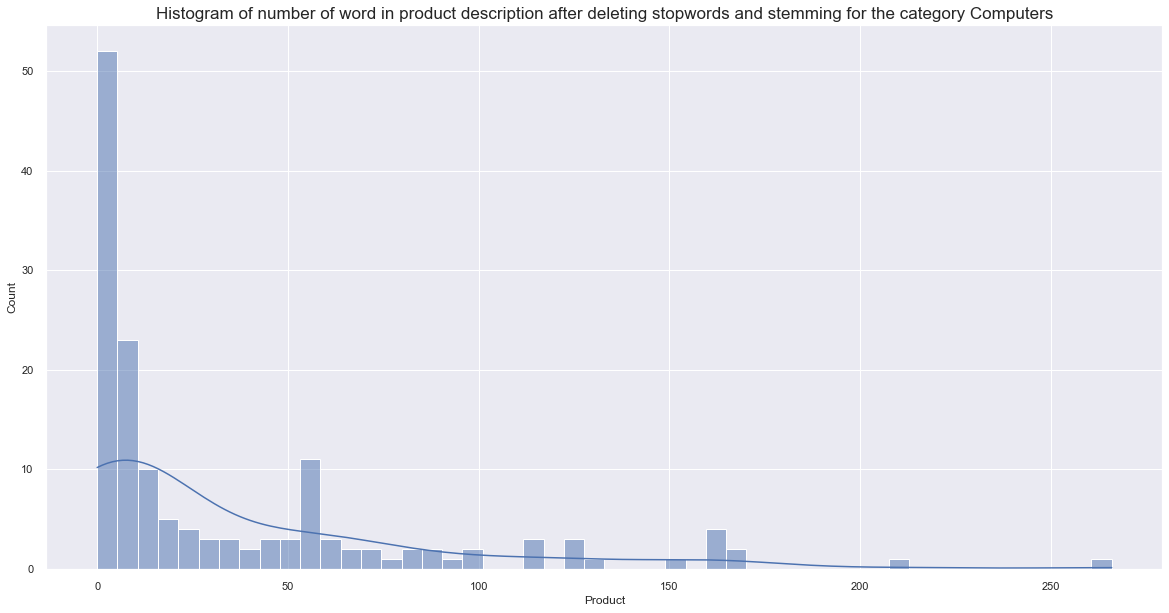

In [61]:
for i in df_freq['cat_1'].unique().tolist():
    plt.figure(figsize=(20, 10))
    plt.title('Histogram of number of word in product description after deleting stopwords and stemming for the category ' + i, size=17)
    plt.xlabel('Product', size=12)
    sns.histplot(df_freq[df_freq['cat_1'] == i]['total'], bins=50, kde=True)

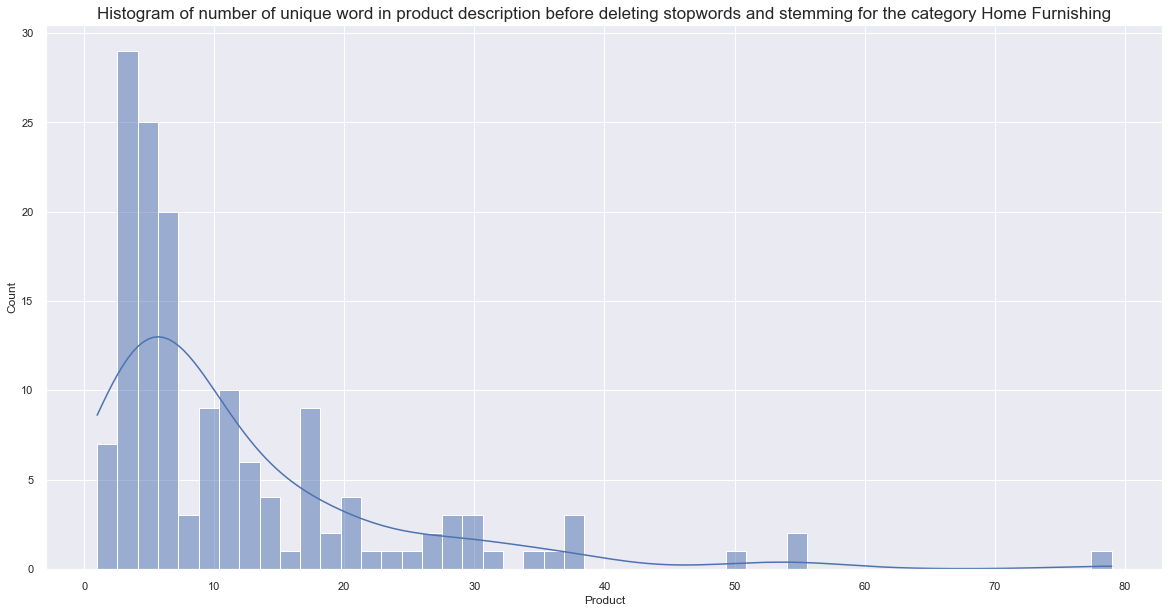

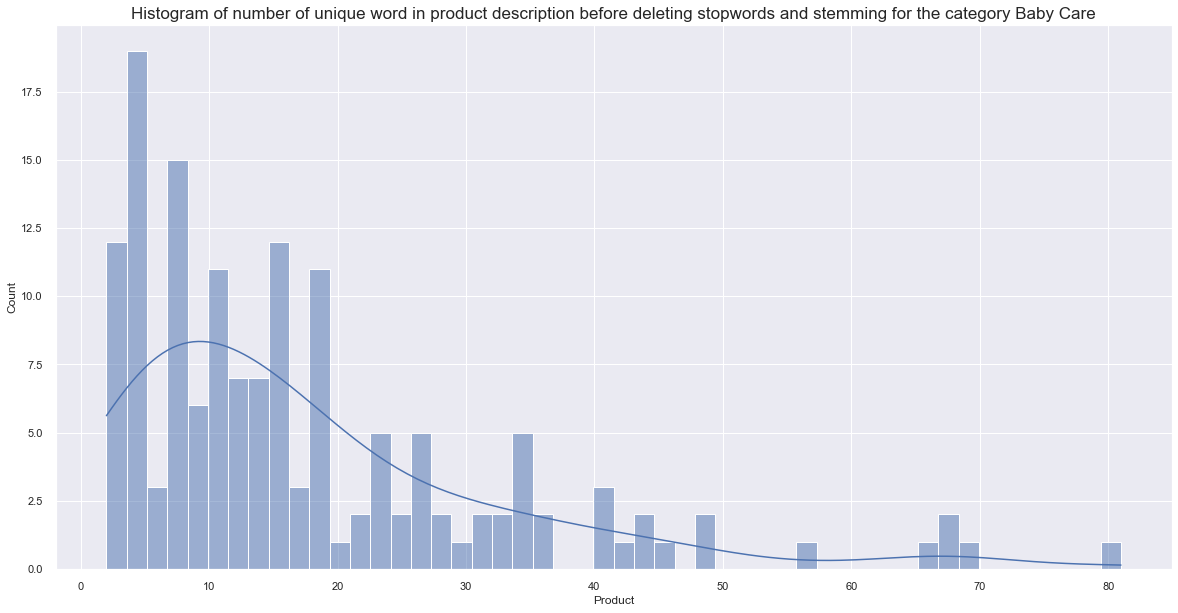

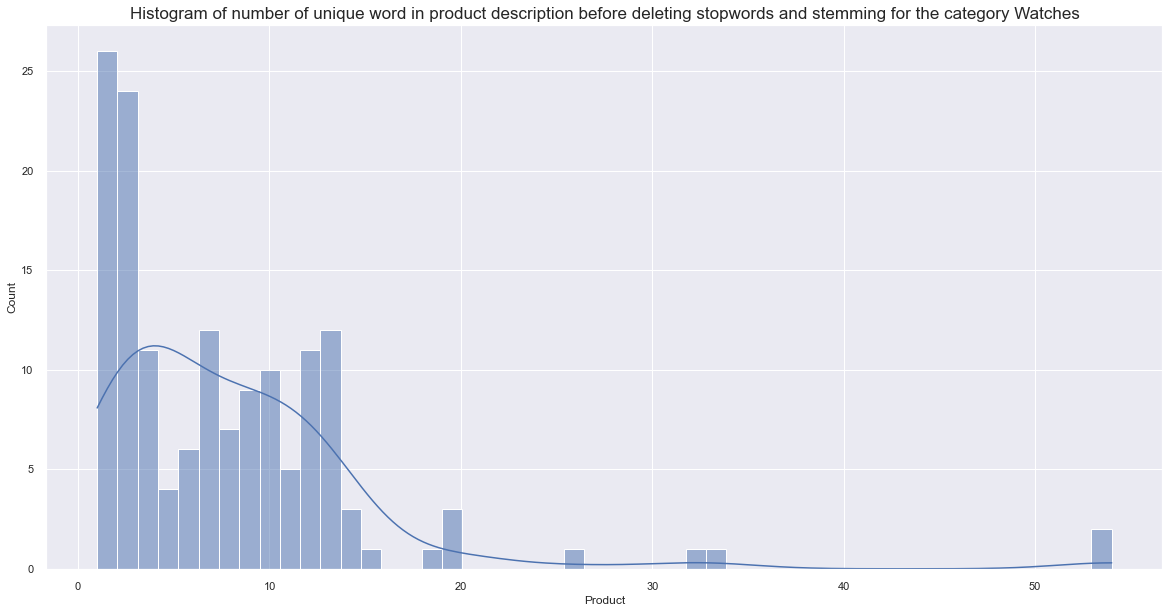

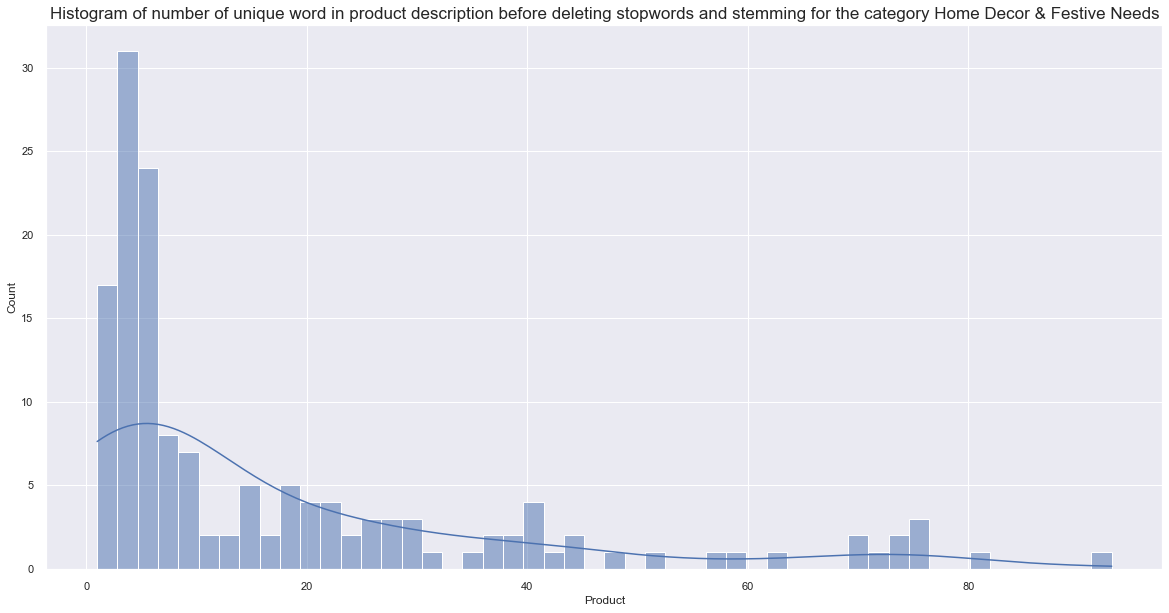

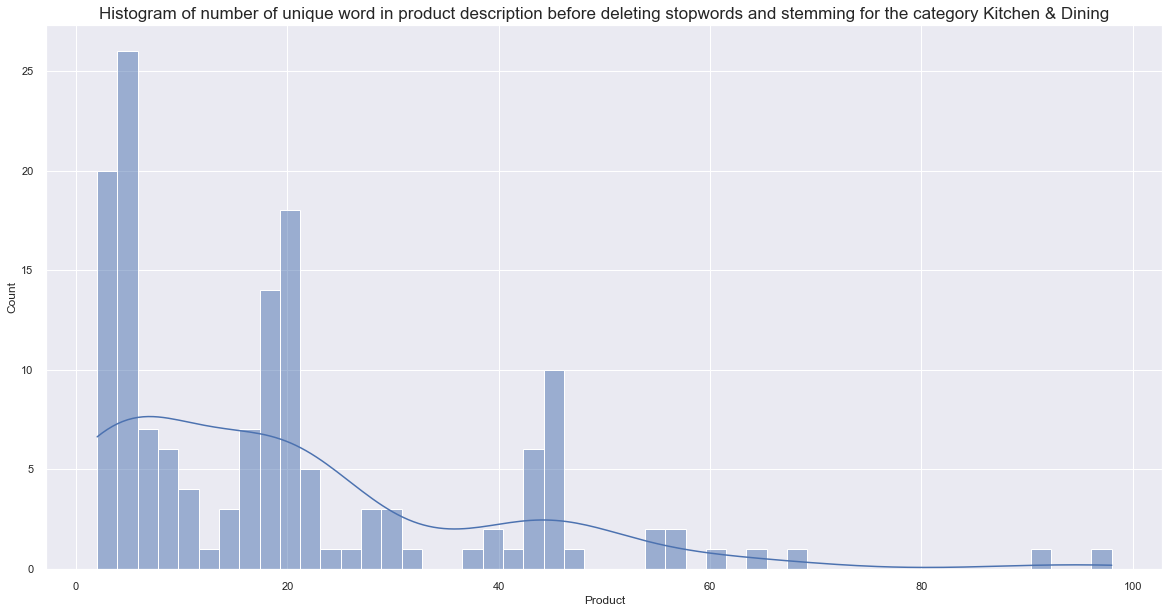

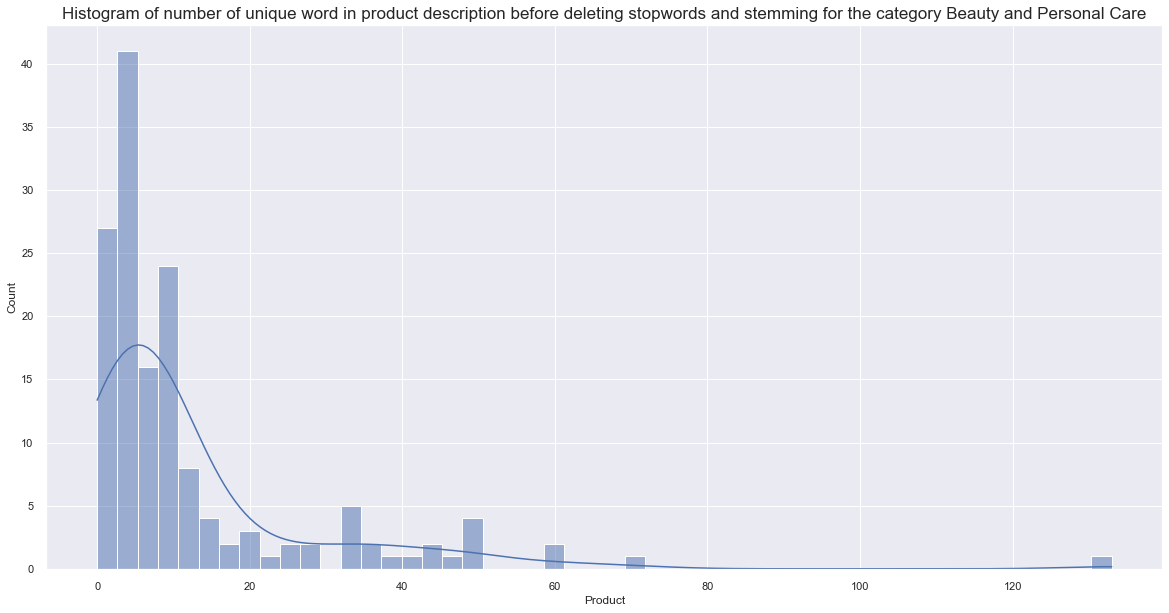

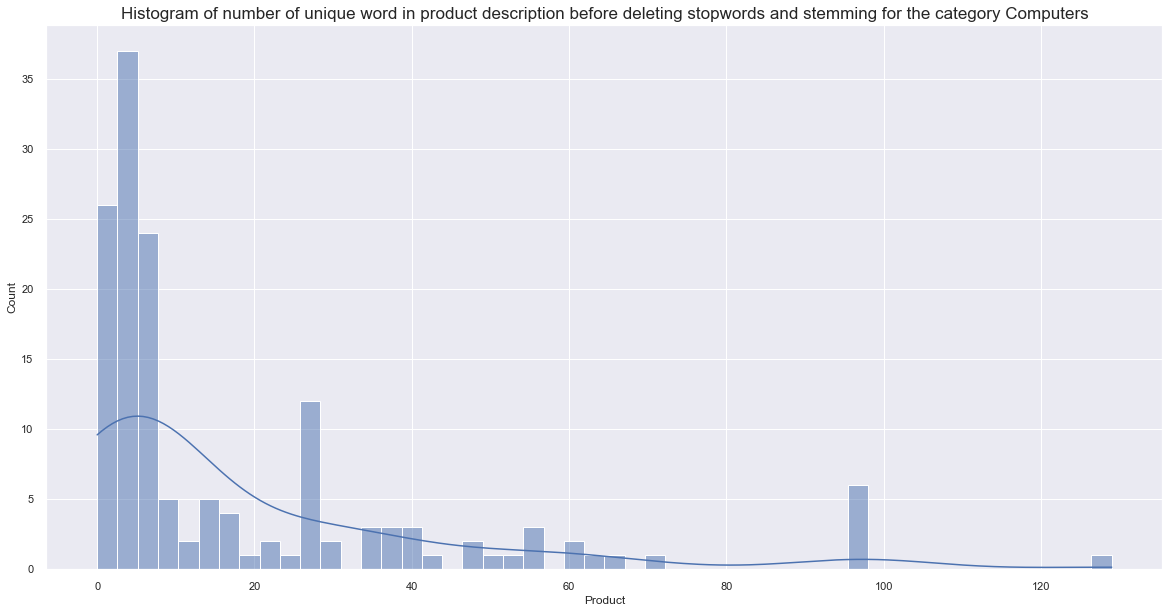

In [62]:
for i in df_freq['cat_1'].unique().tolist():
    plt.figure(figsize=(20, 10))
    plt.title('Histogram of number of unique word in product description before deleting stopwords and stemming for the category ' + i, size=17)
    plt.xlabel('Product', size=12)
    sns.histplot(df_freq[df_freq['cat_1'] == i]['unique'], bins=50, kde=True)

In [63]:
freq_totale = nltk.Counter()
for k, v in corp.iteritems():
    freq_totale += freq[k]

In [64]:
df_word_freq = pd.DataFrame(list(freq_totale.items()), columns=['word', 'freq'])
df_word_freq.head()

word  freq
0      eleg    63
1   polyest    69
2  abstract    53
3    eyelet    44
4      door    39

In [65]:
df_word_freq.shape

(2776, 2)

In [66]:
df['description_final'] = df['description_clean'].apply(lambda x: ' '.join(x))

Finally, we have a total of 2776 unique words.

# 5. Image data<a class="anchor" id="chapter5"></a>

## 5.1. Import Dataset<a class="anchor" id="section_5_1"></a>

In [67]:
path = "C:/Users/melme/Documents/Formation_Data_Scientist/Projet_6/Dataset_projet_pretraitement_textes_images/Flipkart/Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


In [68]:
pix_1 = []
pix_2 = []
for i in range(df.shape[0]):
    filename = path + df['image'][i]
    img = np.array(Image.open(filename))
    pix_1.append(img.shape[0])
    pix_2.append(img.shape[1])

C:\Users\melme\anaconda3\lib\site-packages\PIL\Image.py:2834: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


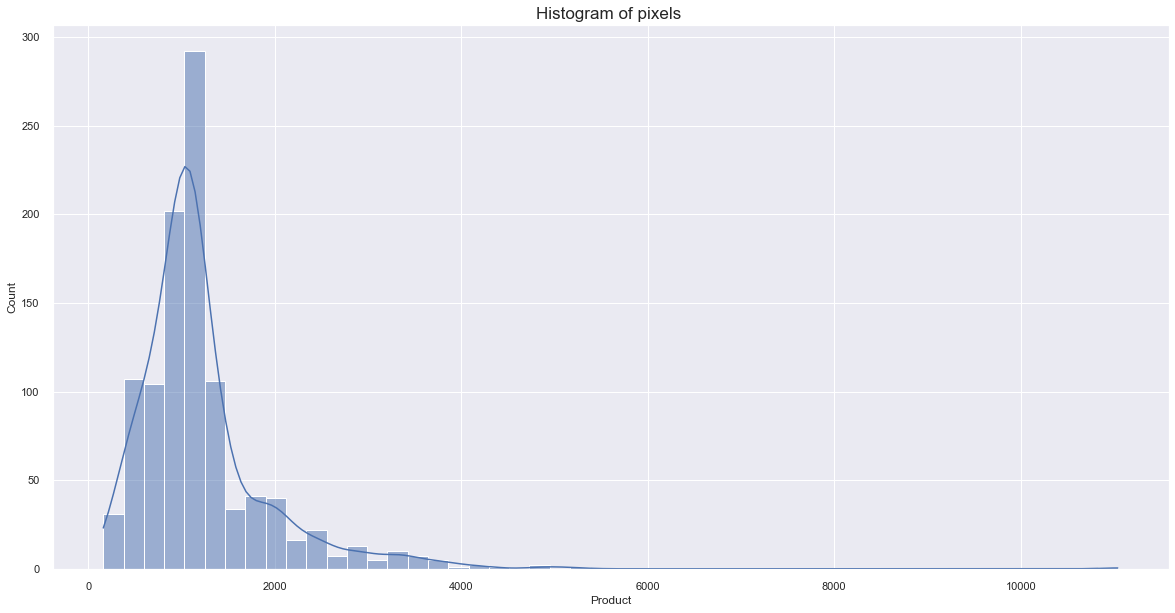

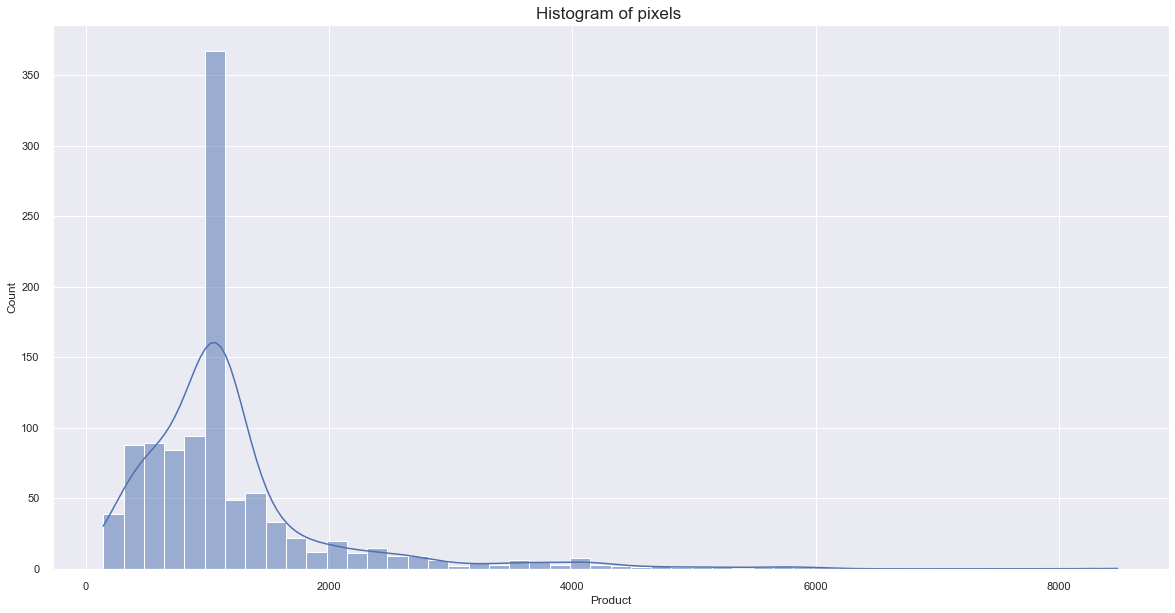

In [69]:
for i in [pix_1, pix_2]:
    plt.figure(figsize=(20, 10))
    plt.title('Histogram of pixels ', size=17)
    plt.xlabel('Product', size=12)
    sns.histplot(i, bins=50, kde=True)

## 5.2. Example image by categories<a class="anchor" id="section_5_2"></a>

Home Furnishing


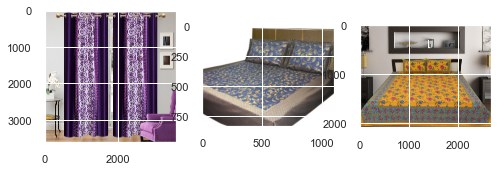

Baby Care


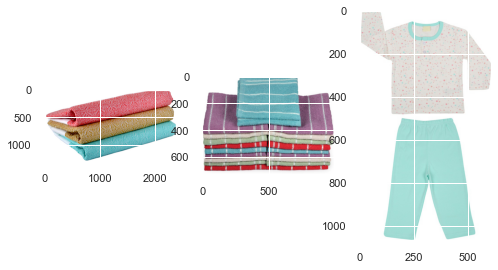

Watches


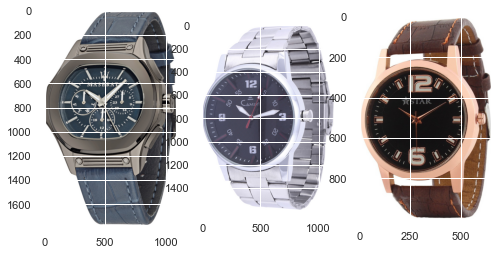

Home Decor & Festive Needs


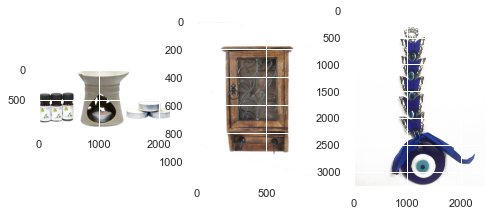

Kitchen & Dining


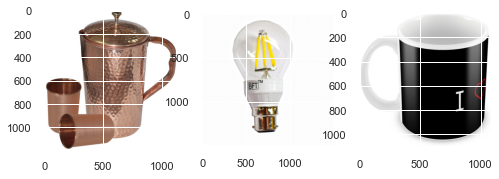

Beauty and Personal Care


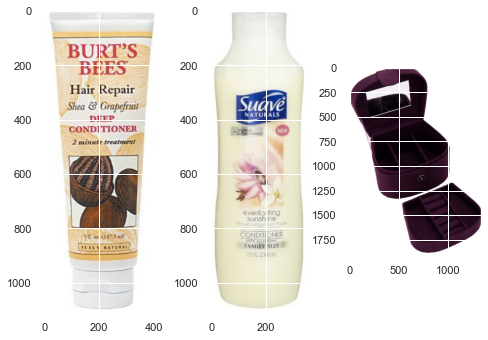

Computers


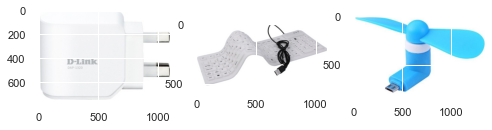

In [70]:
for name in df['cat_1'].unique() :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        cat = df[df['cat_1'] == name].reset_index()
        filename = path + cat['image'][i]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

## 5.3. Image transformation<a class="anchor" id="section_5_3"></a>

### On 1 Image

- In this part, we will show the different transformations that will be carried out on the images.
- We will apply the transforms first to a single image with 2 different libraries/methods (PIL and cv2).

#### Import Image

In [71]:
filename = path + df['image'][525]

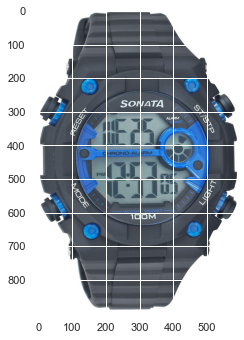

In [72]:
img = np.array(Image.open(filename))
plt.imshow(img)

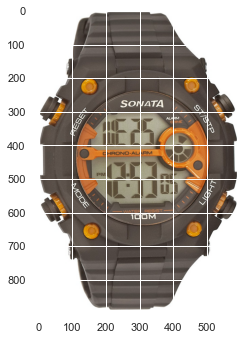

In [73]:
img_2 = cv2.imread(filename)
plt.imshow(img_2)

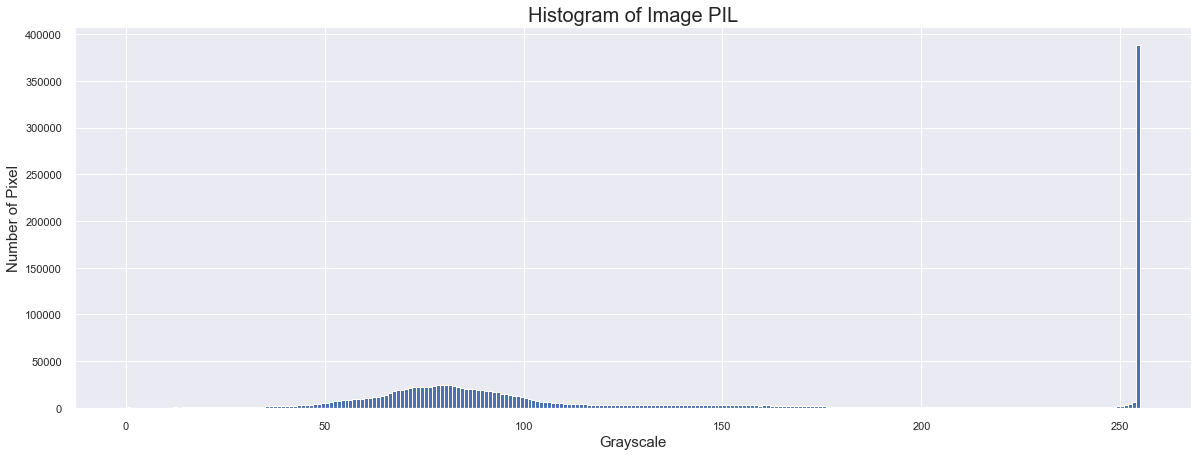

In [74]:
plt.figure(figsize=(20, 7))
plt.title('Histogram of Image PIL', fontsize=20)
plt.xlabel('Grayscale', size=15)
plt.ylabel('Number of Pixel', size=15)

n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.show()

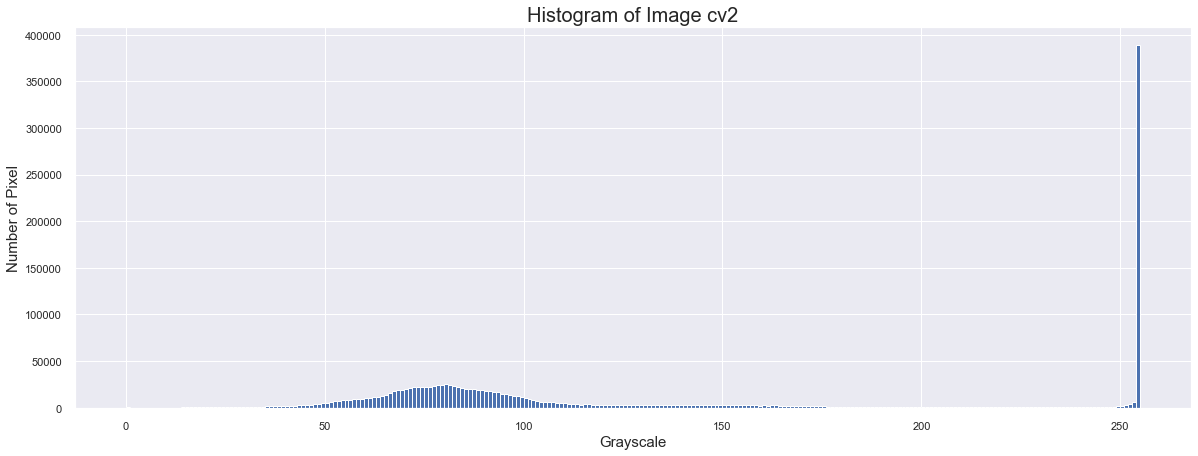

In [75]:
plt.figure(figsize=(20, 7))
plt.title('Histogram of Image cv2', fontsize=20)
plt.xlabel('Grayscale', size=15)
plt.ylabel('Number of Pixel', size=15)

n, bins, patches = plt.hist(img_2.flatten(), bins=range(256))
plt.show()

#### Grayscale

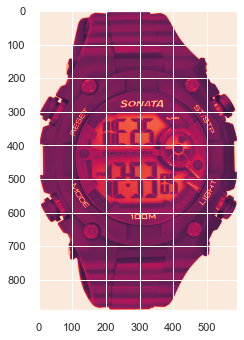

In [76]:
img = Image.open(filename)
img = img.convert('L')
img = np.array(img)
plt.imshow(img)

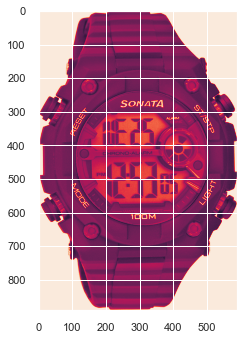

In [77]:
img_2 = cv2.imread(filename, 0)
plt.imshow(img_2)

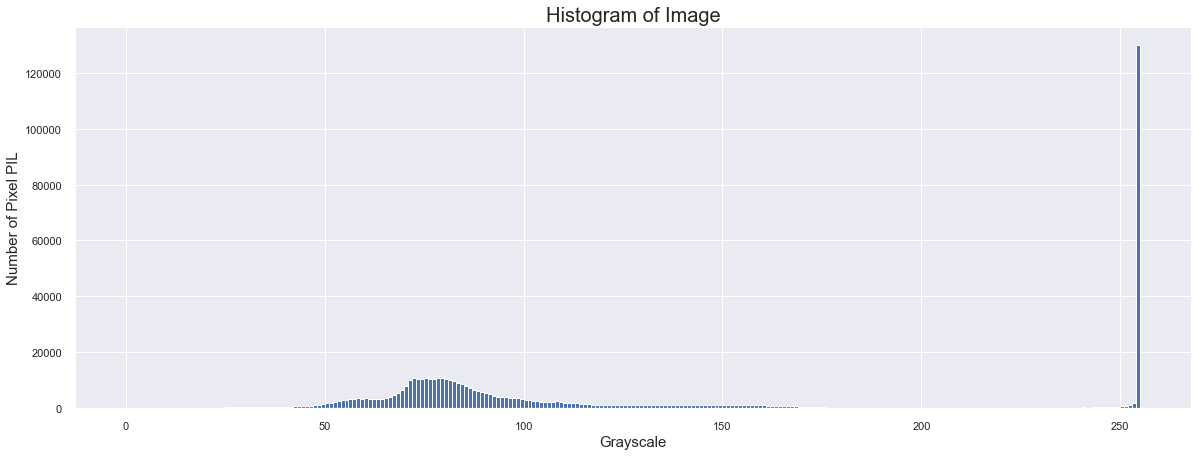

In [78]:
plt.figure(figsize=(20, 7))
plt.title('Histogram of Image', fontsize=20)
plt.xlabel('Grayscale', size=15)
plt.ylabel('Number of Pixel PIL', size=15)

n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.show()

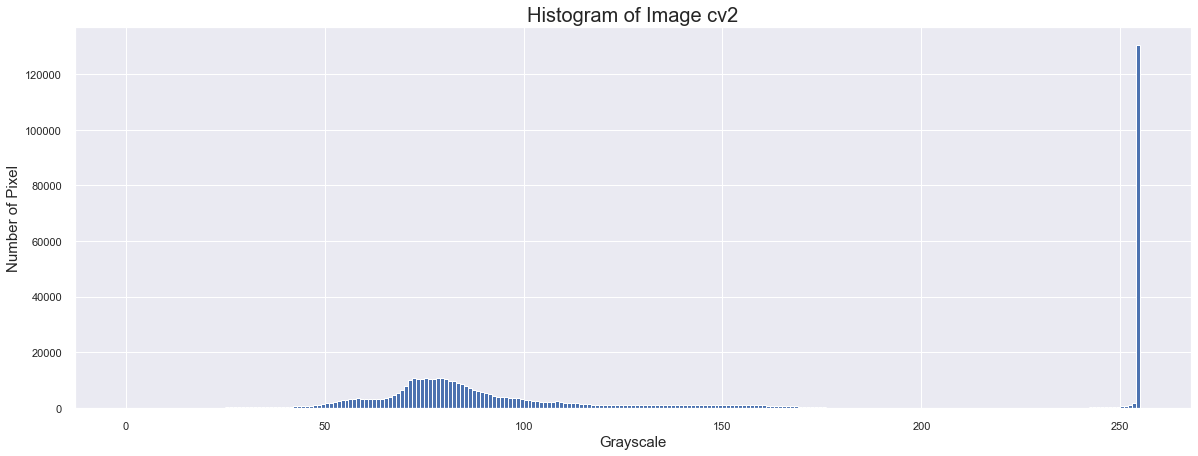

In [79]:
plt.figure(figsize=(20, 7))
plt.title('Histogram of Image cv2', fontsize=20)
plt.xlabel('Grayscale', size=15)
plt.ylabel('Number of Pixel', size=15)

n, bins, patches = plt.hist(img_2.flatten(), bins=range(256))
plt.show()

#### Noise elimination

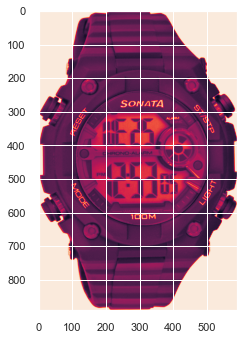

In [80]:
img = Image.fromarray(img)
img = img.filter(ImageFilter.BoxBlur(1))
img = np.array(img)
plt.imshow(img)

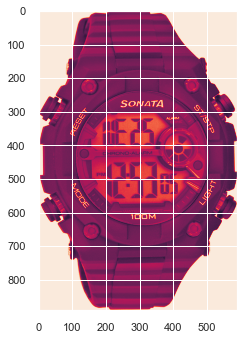

In [81]:
img_2 = cv2.blur(img_2, (1, 1))
plt.imshow(img_2)

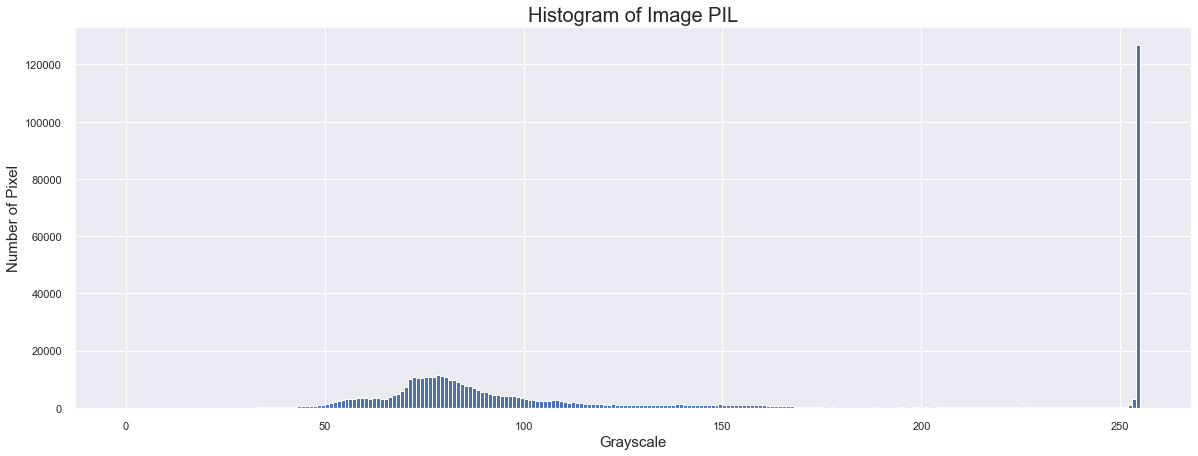

In [82]:
plt.figure(figsize=(20, 7))
plt.title('Histogram of Image PIL', fontsize=20)
plt.xlabel('Grayscale', size=15)
plt.ylabel('Number of Pixel', size=15)

n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.show()

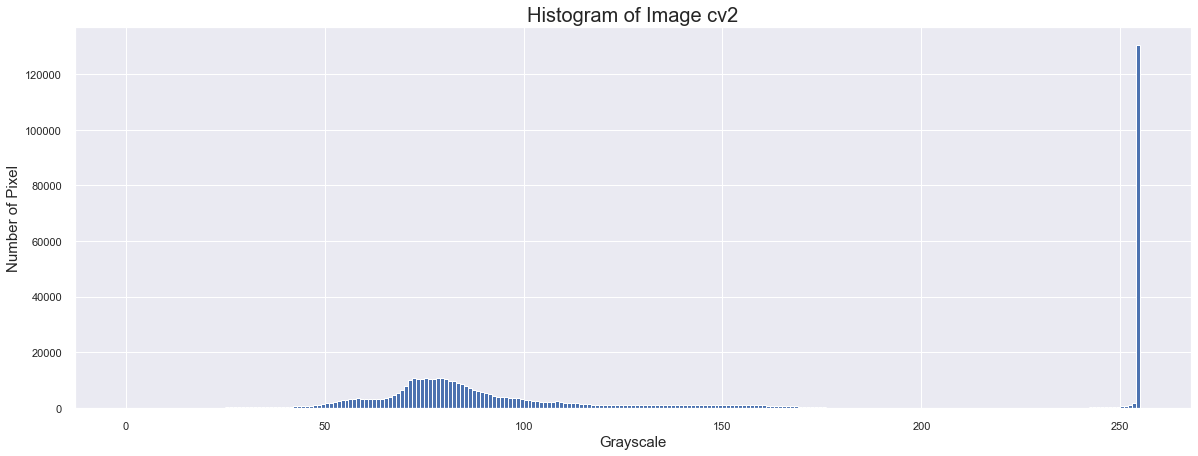

In [83]:
plt.figure(figsize=(20, 7))
plt.title('Histogram of Image cv2', fontsize=20)
plt.xlabel('Grayscale', size=15)
plt.ylabel('Number of Pixel', size=15)

n, bins, patches = plt.hist(img_2.flatten(), bins=range(256))
plt.show()

#### Histogram equalization

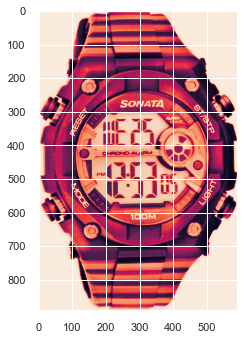

In [84]:
img = Image.fromarray(img)
img = ImageOps.equalize(img)
img = np.array(img)
plt.imshow(img)

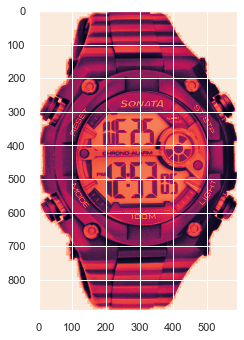

In [85]:
img_2 = cv2.equalizeHist(img_2)
plt.imshow(img_2)

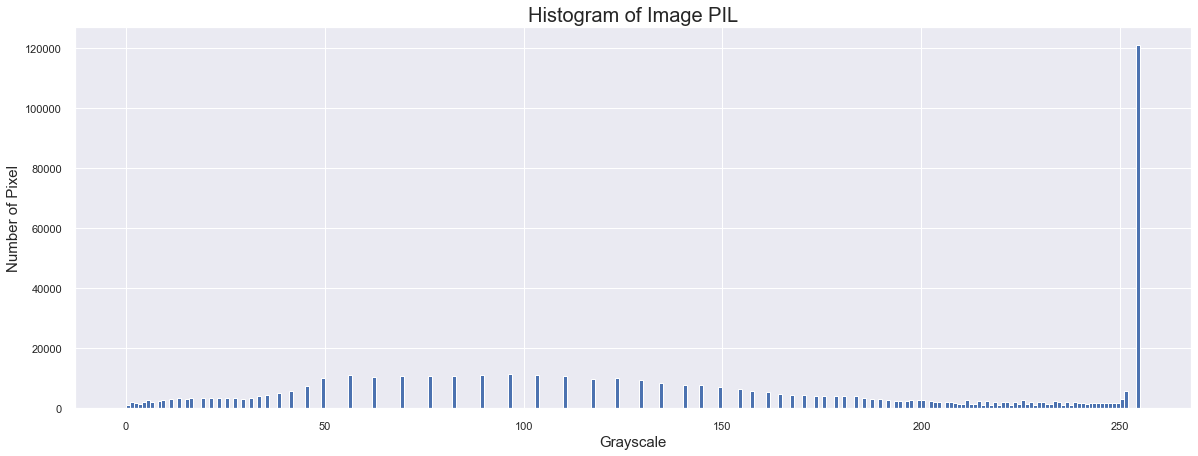

In [86]:
plt.figure(figsize=(20, 7))
plt.title('Histogram of Image PIL', fontsize=20)
plt.xlabel('Grayscale', size=15)
plt.ylabel('Number of Pixel', size=15)

n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.show()

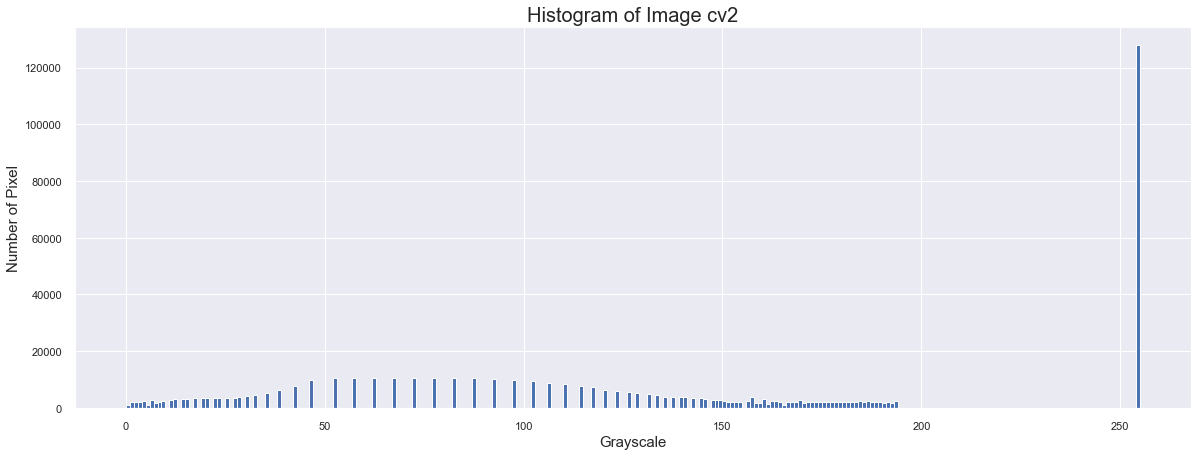

In [87]:
plt.figure(figsize=(20, 7))
plt.title('Histogram of Image cv2', fontsize=20)
plt.xlabel('Grayscale', size=15)
plt.ylabel('Number of Pixel', size=15)

n, bins, patches = plt.hist(img_2.flatten(), bins=range(256))
plt.show()

#### Determination and display of ORB descriptors

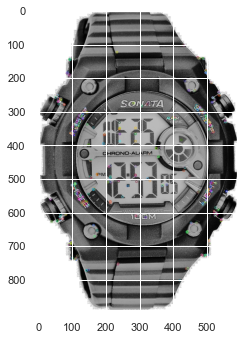

Descriptors :  (500, 32)

[[ 98 170 174 ...   5 214 110]
 [165 170 147 ...  89 131 173]
 [184  72 122 ...  53 110 238]
 ...
 [227  69 231 ... 240 242 168]
 [  9 153 254 ... 192 164 250]
 [ 12  13 214 ... 123 248 138]]


In [88]:
orb = cv2.ORB_create()
kp, des = orb.detectAndCompute(img_2, None)
img_2 = cv2.drawKeypoints(img_2, kp, img_2)
plt.imshow(img_2)
plt.show()
print("Descriptors : ", des.shape)
print()
print(des)

In [89]:
df.to_csv('df_clean.csv', index=False, quoting=1)

In [90]:
joblib.dump(df,'df_clean.pkl')

['df_clean.pkl']